In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=PendingDeprecationWarning)

In [2]:
# import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Enable usage of a normal continuous random variable
from scipy.stats import norm

from wordcloud import WordCloud

import re

import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import contractions

from sklearn.feature_extraction.text import CountVectorizer

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

from numpy import mean
from numpy import std

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras

from sklearn.neural_network import MLPClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shiny\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\shiny\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
C:\Users\shiny\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
C:\Users\shiny\anaconda3\lib\site-packages\tensorflow\core\framework\tensor_shape_pb2.py:43: DeprecationWarning: Call to deprecated create function FieldDescriptor

In [3]:
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


# Problem1

## 1. Text Data Preprocessing

### 1.1 Load the Text Data

In [4]:
df = pd.read_csv('bbc-text.csv')

In [5]:
df.head()

text       category
0  tv future in the hands of viewers with home th...           tech
1  worldcom boss  left books alone  former worldc...       business
2  tigers wary of farrell  gamble  leicester say ...          sport
3  yeading face newcastle in fa cup premiership s...          sport
4  ocean s twelve raids box office ocean s twelve...  entertainment

### Check for Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2225 non-null   object
 1   category  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


### Check for Length of News by Character

In [7]:
df['char_count'] = df['text'].str.len()
df['char_count'].head()

0    4333
1    1842
2    1342
3    2176
4    1579
Name: char_count, dtype: int64

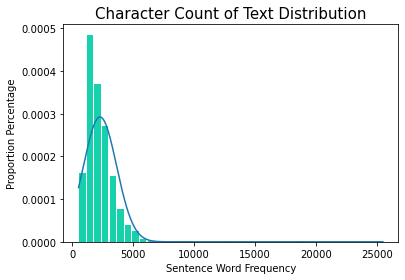

In [8]:
#Create a histogram
plt.hist(df.char_count, bins = 40, rwidth = 0.85, density = True, color = '#15D2AD')
#set x label and ylabel to age and frequency respectively
plt.ylabel('Proportion Percentage')
plt.xlabel('Sentence Word Frequency')
# #Plot the bell-shaped curve/line of a normal distribution
rng = np.arange(df.char_count.min(), df.char_count.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.char_count.mean(), df.char_count.std()))
plt.title("Character Count of Text Distribution", fontsize=15)
plt.show()

In [9]:
df = df.drop('char_count', axis=1)

### Check for Imbalanced Dataset

In [10]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

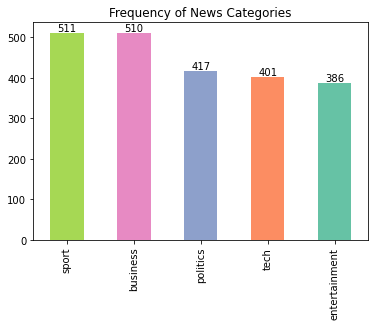

In [11]:
import brewer2mpl
bmap = brewer2mpl.get_map('Set2','qualitative',5,reverse=True)
colors = bmap.mpl_colors

plt.title('Frequency of News Categories')
ax = df['category'].value_counts(sort=True).plot.bar(color=colors)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [12]:
def wordcloud_creation(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

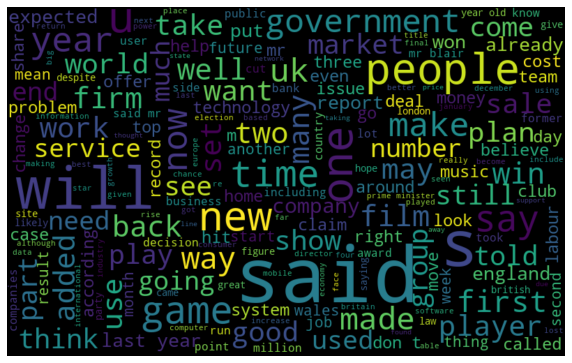

In [13]:
text = df.text.values
words = ' '.join(text)
wordcloud_creation(words)

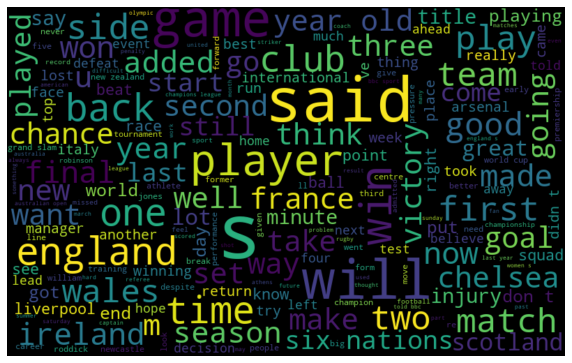

In [14]:
subset = df[df.category=='sport']
text = subset.text.values
words = ' '.join(text)
wordcloud_creation(words)

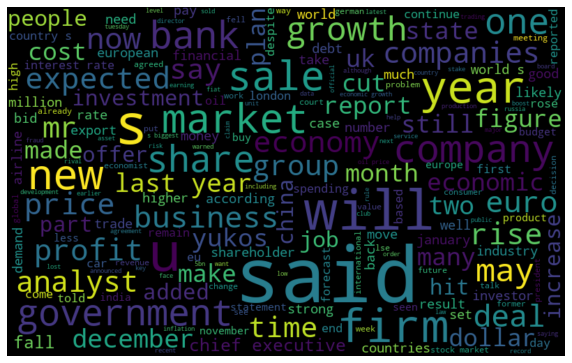

In [15]:
subset = df[df.category=='business']
text = subset.text.values
words = ' '.join(text)
wordcloud_creation(words)

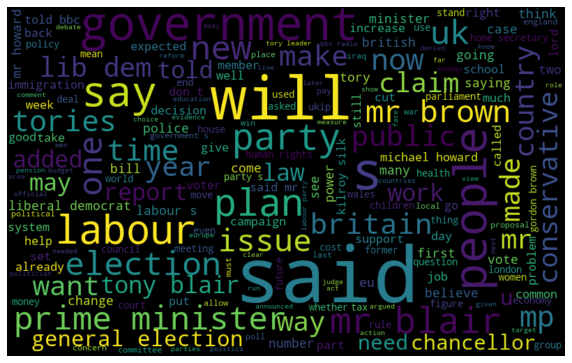

In [16]:
subset = df[df.category=='politics']
text = subset.text.values
words = ' '.join(text)
wordcloud_creation(words)

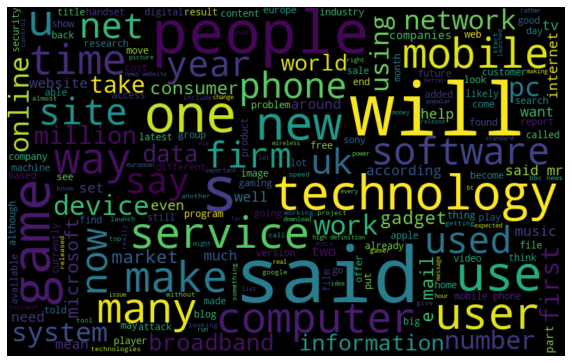

In [17]:
subset = df[df.category=='tech']
text = subset.text.values
words = ' '.join(text)
wordcloud_creation(words)

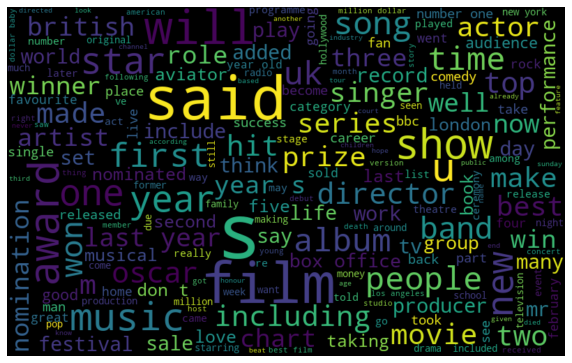

In [18]:
subset = df[df.category=='entertainment']
text = subset.text.values
words = ' '.join(text)
wordcloud_creation(words)

### 1.2 Cleanse the Text Data

In [19]:
df['text'][10]

'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 19

#### (1/3) Custom Stop Words to be Combined with NLTK Stop Words

In [20]:
# Load custom stop words used to combine with stop words from NLTK library
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        custom_stopwords = f.readlines()
        stop_set = set(m.strip() for m in custom_stopwords)
        return set(stop_set)

#load a set of custom stop words
custom_stop_words=get_stop_words("stopwords.txt")
print('Total number of stopwords in text file: ' + str(len(custom_stop_words)))

Total number of stopwords in text file: 423


#### (2/3) NLTK Stop Words to be Combined with Custom Stop Words

In [21]:
#NLTK - get stopwords from NLTK library
nltk_stop_words = set(stopwords.words('english'))
print('Total number of stopwords in NLTK Library: ' + str(len(nltk_stop_words)))

Total number of stopwords in NLTK Library: 179


#### (3/3) Unionizing NTLK + Text File Stop Words

In [22]:
combined_stop_words = custom_stop_words | nltk_stop_words
print('Total number of stopwords combined: ' + str(len(combined_stop_words)))

Total number of stopwords combined: 485


While it is obvious that some of the stop words in the text file are not accounted for in the NLTK stopwords, we could observe that there are instances (i.e. 62) whereby some of the stop words in the NLTK library are not accounted for in the text file as well.

In [23]:
def preprocessing(news_text):
    #convert sentence to lowercase and remove trailing spaces
    news_text = news_text.lower().strip()
    #=========================================================================
    #regex - replace characters that are not words or spaces with empty string
    news_text = re.sub(r'[^\w\s]', '', news_text)
    
    #regex - replace digits with empty string
    news_text = re.sub(r'\b\d+\b', '', news_text)
    
    #regex - remove extra spaces in sentences greater than 1
    news_text = re.sub(' +', ' ', news_text)
    
     # removing word contraction (aren't -> are not)
    news_text = contractions.fix(news_text)
    #=========================================================================
    #NLTK - Temporary Tokenization
    news_text = word_tokenize(news_text)
    
    #Filtering for non-stopwords from NLTK Library
    filtered_stopwords = []
    for word in news_text:
        if word not in combined_stop_words:
            filtered_stopwords.append(word)
    
    #Perform Lemmatization
    lemmatized_sentence = []
    lemmatizer = WordNetLemmatizer()
    for word in filtered_stopwords:
        lemmatized_sentence.append(lemmatizer.lemmatize(word))
        
#     #Perform Stemming
#     ps = PorterStemmer()
#     stemLemmatized_sentence = []
#     for word in lemmatized_sentence:
#         stemLemmatized_sentence.append(ps.stem(word))
        
    #==========================================================================
    # Combining list of words back to a sentence
    news_text = ' '.join(lemmatized_sentence)
    return news_text

In [24]:
df['parsed_text'] = df['text'].apply(preprocessing)

In [25]:
df['parsed_text'][10]

'berlin cheer antinazi film german movie antinazi resistance heroine drawn loud applause berlin film festival sophie scholl final day portrays final day white rose movement scholl arrested beheaded brother han distributing leaflet condemning abhorrent tyranny adolf hitler director marc rothemund feeling responsibility legacy scholls somehow idea alive added film drew transcript gestapo interrogation scholl trial preserved archive communist east germany secret police discovery inspiration film rothemund closely surviving relative including scholl sister ensure historical accuracy film scholl white rose resistance started distributing antinazi leaflet summer arrested dropped leaflet munich university calling day reckoning adolf hitler regime film focus six day scholl arrest intense trial scholl initially deny charge defiant appearance german film vying top prize festival south african film version bizet tragic opera carmen shot cape town xhosa language premiered berlin festival film enti

In [26]:
df = df[['category', 'text', 'parsed_text']]
df.head()

category                                               text  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                                         parsed_text  
0  tv future hand viewer home theatre system plas...  
1  worldcom bos left book former worldcom bos ber...  
2  tiger wary farrell gamble leicester rushed bid...  
3  yeading newcastle fa cup premiership newcastle...  
4  ocean twelve raid box office ocean twelve crim...

### 1.3 Bag-of-Word

In [27]:
texts_all = df['parsed_text']

In [28]:
texts_all.head()

0    tv future hand viewer home theatre system plas...
1    worldcom bos left book former worldcom bos ber...
2    tiger wary farrell gamble leicester rushed bid...
3    yeading newcastle fa cup premiership newcastle...
4    ocean twelve raid box office ocean twelve crim...
Name: parsed_text, dtype: object

In [29]:
texts_all.shape

(2225,)

In [30]:
count_vect = CountVectorizer(max_df=0.17, stop_words=combined_stop_words)
texts_counts = count_vect.fit_transform(texts_all)

In [31]:
texts_counts.shape

(2225, 28256)

In [32]:
count_vect.stop_words_

{'added',
 'bbc',
 'company',
 'country',
 'day',
 'expected',
 'firm',
 'game',
 'government',
 'home',
 'market',
 'million',
 'month',
 'people',
 'plan',
 'player',
 'set',
 'time',
 'told',
 'uk',
 'week',
 'win',
 'world'}

In [33]:
sum_words = texts_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [34]:
print('The highest frequency words:')
words_freq[0:20] 

The highest frequency words:


[('film', 1113),
 ('service', 880),
 ('music', 835),
 ('labour', 796),
 ('party', 778),
 ('minister', 737),
 ('sale', 734),
 ('election', 702),
 ('technology', 669),
 ('mobile', 633),
 ('play', 630),
 ('england', 616),
 ('phone', 604),
 ('blair', 598),
 ('award', 595),
 ('report', 577),
 ('top', 564),
 ('public', 555),
 ('system', 552),
 ('european', 541)]

In [35]:
print('The lowest frequency words:') 
words_freq[-20:]

The lowest frequency words:


[('balloch', 1),
 ('lomond', 1),
 ('kickstart', 1),
 ('hampden', 1),
 ('bellahouston', 1),
 ('ticketweb', 1),
 ('snowball', 1),
 ('rationally', 1),
 ('postneoclassical', 1),
 ('wonk', 1),
 ('heinous', 1),
 ('convict', 1),
 ('induce', 1),
 ('selfishly', 1),
 ('ensues', 1),
 ('perverse', 1),
 ('exhorting', 1),
 ('solomon', 1),
 ('allocating', 1),
 ('heerenveen', 1)]

In [36]:
count_vect.get_feature_names()

C:\Users\shiny\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000acre',
 '000ayear',
 '000bn',
 '000m',
 '000s',
 '000seat',
 '000seater',
 '000strong',
 '000th',
 '000vote',
 '001and',
 '001st',
 '004secs',
 '019secs',
 '0530gmt',
 '053bn',
 '083mph',
 '10',
 '100',
 '1000m',
 '1000th',
 '1004secs',
 '100bn',
 '100hours',
 '100m',
 '100ml',
 '100mshare',
 '101yearold',
 '10216bn',
 '1025m',
 '1026bn',
 '1028bn',
 '102bn',
 '102inch',
 '102m',
 '1038am',
 '103bn',
 '103m',
 '104bn',
 '104m',
 '105bn',
 '105m',
 '106bn',
 '106cm',
 '106km',
 '106m',
 '106m546m',
 '1075p',
 '107bn',
 '107m',
 '1085m',
 '108bn',
 '109bn',
 '109m',
 '10bn',
 '10cm',
 '10day',
 '10ft',
 '10game',
 '10games',
 '10k',
 '10km',
 '10m',
 '10man',
 '10match',
 '10mile',
 '10minute',
 '10month',
 '10secs',
 '10th',
 '10times',
 '10week',
 '10x7in',
 '10year',
 '1102m',
 '110m',
 '110th',
 '111bn',
 '111m',
 '112m',
 '1130p',
 '1135m',
 '1135p',
 '113bn',
 '113th',
 '114m',
 '115bn',
 '115m',
 '1164m',
 '116bn',
 '116i',
 '1177bn',
 '117bn',
 '117m',
 '117th',
 '118m',
 '1

In [37]:
feature_names=np.array(count_vect.get_feature_names())
len(count_vect.get_feature_names())

28256

In [38]:
pd.DataFrame(texts_counts.toarray())

0      1      2      3      4      5      6      7      8      9      \
0         0      0      0      0      0      0      0      0      0      0   
1         0      0      0      0      0      0      0      0      0      0   
2         0      0      0      0      0      0      0      0      0      0   
3         0      0      0      0      0      0      0      0      0      0   
4         0      0      0      0      0      0      0      0      0      0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2220      0      0      0      0      0      0      0      0      0      0   
2221      0      0      0      0      0      0      0      0      0      0   
2222      0      0      0      0      0      0      0      0      0      0   
2223      0      0      0      0      0      0      0      0      0      0   
2224      0      0      0      0      0      0      0      0      0      0   

      ...  28246  28247  28248  28249  28250  28251  28252  28253  28254  \
0     ...      0      0      0      0      0      0      0      0      0   
1     ...      0      0      0      0      0      0      0      0      0   
2     ...      0      0      0      0      0      0      0      0      0   
3     ...      0      0      0      0      0      0      0      0      0   
4     ...      0      0      0      0      0      0      0      0      0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2220  ...      0      0      0      0      0      0      0      0      0   
2221  ...      0      0      0      0      0      0      0      0      0   
2222  ...      0      0      0      0      0      0      0      0      0   
2223  ...      0      0      0      0      0      0      0      0      0   
2224  ...      0      0      0      0      0      0      0      0      0   

      28255  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
2220      0  
2221      0  
2222      0  
2223      0  
2224      0  

[2225 rows x 28256 columns]

### 1.4 TF-IDF

In [39]:
# Generate TF-IDF matrix
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(use_idf=True)
texts_tfidf = tfidf_transformer.fit_transform(texts_counts)

In [40]:
tfidf_transformer.idf_

array([8.01481435, 8.01481435, 8.01481435, ..., 8.01481435, 7.60934924,
       7.60934924])

In [41]:
tfidf_transformer.idf_.shape

(28256,)

In [42]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['five' 'play' 'news' 'service' 'top' 'minister' 'chief' 'hit' 'including'
 'former' 'move' 'according' 'help' 'public' 'director' 'report' 'sale'
 'six' 'third' 'international' 'record' 'issue' 'british' 'business'
 'look' 'start' 'despite' 'decision' 'mean' 'life' 'cost' 'change'
 'london' 'european' 'film' 'future' 'result' 'seen' 'money' 'figure'
 'spokesman' 'lot' 'deal' 'claim' 'analyst' 'executive' 'run' 'industry'
 'earlier' 'called' 'star' 'party' 'britain' 'share' 'taking' 'saying'
 'system' 'action' 'national' 'able' 'hope' 'due' 'europe' 'leader' 'team'
 'lost' 'recent' 'england' 'past' 'technology' 'biggest' 'found' 'office'
 'labour' 'chance' 'music' 'level' 'following' 'offer' 'january'
 'programme' 'website' 'price' 'looking' 'job' 'final' 'major' 'growth'
 'using' 'believe' 'ahead' 'election' 'cut' 'currently' 'michael' 'nation'
 'return' 'rise' 'support' 'real']


In [43]:
pd.DataFrame(texts_tfidf.toarray())

0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2220    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2221    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2222    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2223    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2224    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  28246  28247  28248  28249  28250  28251  28252  28253  28254  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2220  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2221  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2222  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2223  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2224  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      28255  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
2220    0.0  
2221    0.0  
2222    0.0  
2223    0.0  
2224    0.0  

[2225 rows x 28256 columns]

In [44]:
# find maximum value for each of the features over dataset:
max_value = texts_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['baffling' 'boringly' 'brainwashed' 'booo' 'speechless' 'disputing'
 'snobby' 'yearsperhaps' 'lyrically' 'nope' 'hiss' 'ridiculuous' 'artisic'
 'coffin' 'embarassment' 'bargaining' 'ditty' 'angelsi' 'mediocrity'
 'appelas']
Features with highest tfidf: 
['axa' 'argonaut' 'duran' 'hague' 'mci' 'uwb' 'sayeed' 'ballet' 'qantas'
 'nestle' 'ink' 'godzilla' 'fiat' 'blog' 'domain' 'casino' 'p2p'
 'dallaglio' 'regiment' 'commodore']


## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [45]:
topn = 5
results =[]
results_without_tfidf = []

In [46]:
for idx, doc in texts_all.items():
    #generate tf-idf for the given document
    tf_idf_vector=texts_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col,
                            tf_idf_vector.tocoo().data),
                        columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    results_without_tfidf.append(word)
    results.append(result)

In [47]:
len(results)

2225

In [48]:
df['cleansed_text'] = texts_all
df['keywords_tfidf'] = results
df['keywords'] = results_without_tfidf
df.head()

category                                               text  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                                         parsed_text  \
0  tv future hand viewer home theatre system plas...   
1  worldcom bos left book former worldcom bos ber...   
2  tiger wary farrell gamble leicester rushed bid...   
3  yeading newcastle fa cup premiership newcastle...   
4  ocean twelve raid box office ocean twelve crim...   

                                       cleansed_text  \
0  tv future hand viewer home theatre system plas...   
1  worldcom bos left book former worldcom bos ber...   
2  tiger wary farrell gamble leicester rushed bid...   
3  yeading newcastle fa cup premiership newcastle...   
4  ocean twelve raid box office ocean twelve crim...   

                                      keywords_tfidf  \
0  {'tv': 0.382, 'dvr': 0.245, 'brand': 0.223, 'h...   
1  {'worldcom': 0.466, 'ebbers': 0.428, 'myers': ...   
2  {'farrell': 0.536, 'gamble': 0.316, 'leicester...   
3  {'yeading': 0.296, 'west': 0.156, 'scunthorpe'...   
4  {'ocean': 0.356, 'sequel': 0.313, 'twelve': 0....   

                                            keywords  
0                  [tv, dvr, brand, hanlon, channel]  
1  [worldcom, ebbers, myers, accounting, weingarten]  
2        [farrell, gamble, leicester, rugby, league]  
3    [yeading, west, scunthorpe, nonleague, watford]  
4       [ocean, sequel, twelve, soderbergh, clooney]

In [49]:
df.to_csv('bbc_export.csv')

### 2.2 Association Rules Mining on keywords

Reference used: 

Sucharita Das. (2020, June 29). Data Science using Python -- Association Rule Mining (Demo using mlxtend) [Video]. YouTube. https://www.youtube.com/watch?v=0yaYwDyBxFA

In [50]:
transaction_encoder = TransactionEncoder()

## All Category 

In [51]:
df_all = df.copy()

In [52]:
df_all.head()

category                                               text  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                                         parsed_text  \
0  tv future hand viewer home theatre system plas...   
1  worldcom bos left book former worldcom bos ber...   
2  tiger wary farrell gamble leicester rushed bid...   
3  yeading newcastle fa cup premiership newcastle...   
4  ocean twelve raid box office ocean twelve crim...   

                                       cleansed_text  \
0  tv future hand viewer home theatre system plas...   
1  worldcom bos left book former worldcom bos ber...   
2  tiger wary farrell gamble leicester rushed bid...   
3  yeading newcastle fa cup premiership newcastle...   
4  ocean twelve raid box office ocean twelve crim...   

                                      keywords_tfidf  \
0  {'tv': 0.382, 'dvr': 0.245, 'brand': 0.223, 'h...   
1  {'worldcom': 0.466, 'ebbers': 0.428, 'myers': ...   
2  {'farrell': 0.536, 'gamble': 0.316, 'leicester...   
3  {'yeading': 0.296, 'west': 0.156, 'scunthorpe'...   
4  {'ocean': 0.356, 'sequel': 0.313, 'twelve': 0....   

                                            keywords  
0                  [tv, dvr, brand, hanlon, channel]  
1  [worldcom, ebbers, myers, accounting, weingarten]  
2        [farrell, gamble, leicester, rugby, league]  
3    [yeading, west, scunthorpe, nonleague, watford]  
4       [ocean, sequel, twelve, soderbergh, clooney]

In [53]:
all_visualize = []
for row in df_all['keywords']:
    for word in row:
        all_visualize.append(word)

In [54]:
all_visualize = pd.Series(all_visualize)
all_visualize.value_counts()

film          86
labour        52
blair         51
award         48
brown         48
              ..
bondi          1
instatmdr      1
irancell       1
depp           1
heerenveen     1
Length: 4739, dtype: int64

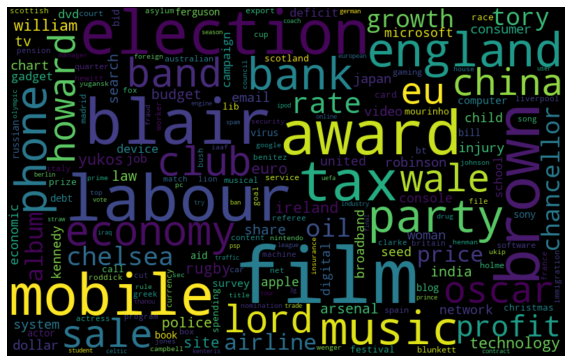

In [55]:
# # Word Cloud
listToStr = ' '.join([str(elem) for elem in all_visualize])
wordcloud_creation(listToStr)

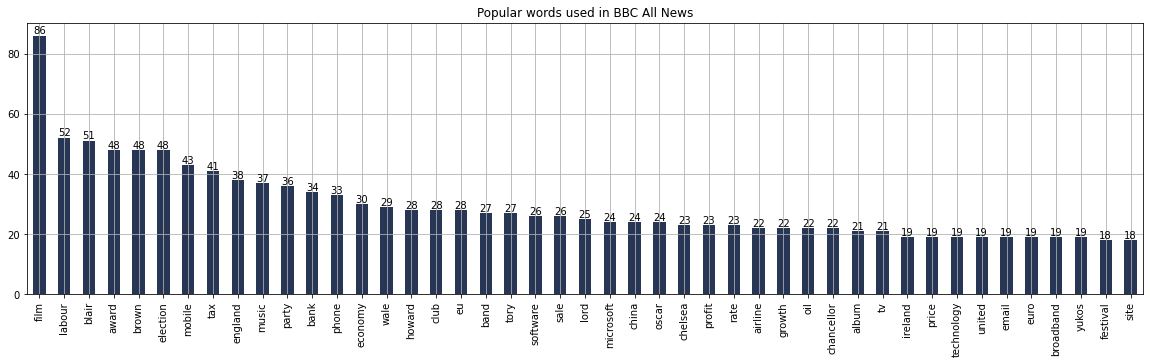

In [56]:
plt.figure(figsize=(20,5))
ax = all_visualize.value_counts().head(45).plot.bar(color='#283655')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Popular words used in BBC All News')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [57]:
all_nested = []
for row in df_all['keywords']:
    all_nested.append(row)

In [58]:
all_nested

[['tv', 'dvr', 'brand', 'hanlon', 'channel'],
 ['worldcom', 'ebbers', 'myers', 'accounting', 'weingarten'],
 ['farrell', 'gamble', 'leicester', 'rugby', 'league'],
 ['yeading', 'west', 'scunthorpe', 'nonleague', 'watford'],
 ['ocean', 'sequel', 'twelve', 'soderbergh', 'clooney'],
 ['howard', 'mongrel', 'rattled', 'hain', 'party'],
 ['parliament', 'election', 'blair', 'easter', 'dissolve'],
 ['henman', 'raining', 'seed', 'umpire', 'ljubicic'],
 ['wilkinson', '25yearold', 'injury', 'edinburgh', 'england'],
 ['rating', 'lucas', 'pg', 'sith', 'film'],
 ['scholl', 'film', 'antinazi', 'leaflet', 'berlin'],
 ['virgin', 'blue', 'jetstar', 'profit', 'airline'],
 ['price', 'crude', 'oil', 'barrel', 'opec'],
 ['hague', 'ambition', 'party', 'front', 'bench'],
 ['roddick', 'moya', 'davis', 'clay', 'spain'],
 ['lg', 'card', 'creditor', 'debt', 'korea'],
 ['cell', 'stem', 'tissue', 'research', 'howard'],
 ['connors', 'lta', 'manga', 'jimmy', 'coach'],
 ['ufj', 'sumitomo', 'mitsubishi', 'bank', 'japan

In [59]:
all_transformed = transaction_encoder.fit(all_nested).transform(all_nested)

In [60]:
df_all = pd.DataFrame(all_transformed, columns = transaction_encoder.columns_)
df_all.head()

000m  000th   100m  1026bn   10km  1500m   168m  17yearold   18bn  \
0  False  False  False   False  False  False  False      False  False   
1  False  False  False   False  False  False  False      False  False   
2  False  False  False   False  False  False  False      False  False   
3  False  False  False   False  False  False  False      False  False   
4  False  False  False   False  False  False  False      False  False   

   18rated  ...  yuganskneftegas  yuganskneftegaz  yukos  yushchenko   zach  \
0    False  ...            False            False  False       False  False   
1    False  ...            False            False  False       False  False   
2    False  ...            False            False  False       False  False   
3    False  ...            False            False  False       False  False   
4    False  ...            False            False  False       False  False   

   zambia  zealand  zenden  zidane  zvonareva  
0   False    False   False   False      False  
1   False    False   False   False      False  
2   False    False   False   False      False  
3   False    False   False   False      False  
4   False    False   False   False      False  

[5 rows x 4739 columns]

## All Category: Support Threshold

In [61]:
frequent_itemsets_all = apriori(df_all, min_support = 0.005, 
                                  use_colnames = True)
frequent_itemsets_all

support            itemsets
0    0.005843             (actor)
1    0.005843               (aid)
2    0.009888           (airline)
3    0.009438             (album)
4    0.006742             (apple)
..        ...                 ...
115  0.006292     (labour, brown)
116  0.006292   (growth, economy)
117  0.006292  (labour, election)
118  0.006292    (festival, film)
119  0.009438     (mobile, phone)

[120 rows x 2 columns]

In [62]:
frequent_itemsets_all[['support']].describe()

support
count  120.000000
mean     0.009022
std      0.004907
min      0.005393
25%      0.006292
50%      0.007191
75%      0.009888
max      0.038652

## All Category: Confidence Threshold

In [63]:
rules_c = association_rules(frequent_itemsets_all, metric="confidence", min_threshold=0.2)
rules_c

antecedents   consequents  antecedent support  consequent support  \
0        (award)        (film)            0.021573            0.038652   
1        (brown)       (blair)            0.021573            0.022921   
2        (blair)       (brown)            0.022921            0.021573   
3       (labour)       (blair)            0.023371            0.022921   
4        (blair)      (labour)            0.022921            0.023371   
5        (brown)  (chancellor)            0.021573            0.009888   
6   (chancellor)       (brown)            0.009888            0.021573   
7       (labour)       (brown)            0.023371            0.021573   
8        (brown)      (labour)            0.021573            0.023371   
9       (growth)     (economy)            0.009888            0.013483   
10     (economy)      (growth)            0.013483            0.009888   
11      (labour)    (election)            0.023371            0.021573   
12    (election)      (labour)            0.021573            0.023371   
13    (festival)        (film)            0.008090            0.038652   
14      (mobile)       (phone)            0.019326            0.014831   
15       (phone)      (mobile)            0.014831            0.019326   

     support  confidence       lift  leverage  conviction  
0   0.005843    0.270833   7.007025  0.005009    1.318421  
1   0.006292    0.291667  12.724673  0.005798    1.379405  
2   0.006292    0.274510  12.724673  0.005798    1.348643  
3   0.006742    0.288462  12.584842  0.006206    1.373192  
4   0.006742    0.294118  12.584842  0.006206    1.383558  
5   0.007191    0.333333  33.712121  0.006978    1.485169  
6   0.007191    0.727273  33.712121  0.006978    3.587566  
7   0.006292    0.269231  12.479968  0.005788    1.338900  
8   0.006292    0.291667  12.479968  0.005788    1.378771  
9   0.006292    0.636364  47.196970  0.006159    2.712921  
10  0.006292    0.466667  47.196970  0.006159    1.856461  
11  0.006292    0.269231  12.479968  0.005788    1.338900  
12  0.006292    0.291667  12.479968  0.005788    1.378771  
13  0.006292    0.777778  20.122739  0.005979    4.326067  
14  0.009438    0.488372  32.928118  0.009152    1.925557  
15  0.009438    0.636364  32.928118  0.009152    2.696854

In [64]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

antecedents   consequents  antecedent support  consequent support  \
13    (festival)        (film)            0.008090            0.038652   
6   (chancellor)       (brown)            0.009888            0.021573   
9       (growth)     (economy)            0.009888            0.013483   
15       (phone)      (mobile)            0.014831            0.019326   
14      (mobile)       (phone)            0.019326            0.014831   
10     (economy)      (growth)            0.013483            0.009888   
5        (brown)  (chancellor)            0.021573            0.009888   
4        (blair)      (labour)            0.022921            0.023371   
1        (brown)       (blair)            0.021573            0.022921   
8        (brown)      (labour)            0.021573            0.023371   

     support  confidence       lift  leverage  conviction  
13  0.006292    0.777778  20.122739  0.005979    4.326067  
6   0.007191    0.727273  33.712121  0.006978    3.587566  
9   0.006292    0.636364  47.196970  0.006159    2.712921  
15  0.009438    0.636364  32.928118  0.009152    2.696854  
14  0.009438    0.488372  32.928118  0.009152    1.925557  
10  0.006292    0.466667  47.196970  0.006159    1.856461  
5   0.007191    0.333333  33.712121  0.006978    1.485169  
4   0.006742    0.294118  12.584842  0.006206    1.383558  
1   0.006292    0.291667  12.724673  0.005798    1.379405  
8   0.006292    0.291667  12.479968  0.005788    1.378771

<AxesSubplot:>

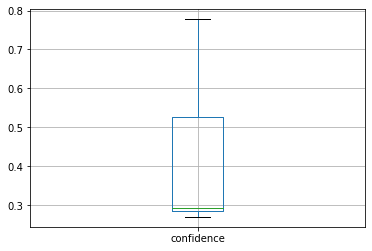

In [65]:
rules_c[['confidence']].boxplot()

## All Category: Lift Threshold

In [66]:
rules_l = association_rules(frequent_itemsets_all, metric = 'lift', min_threshold = 20)
rules_l

antecedents   consequents  antecedent support  consequent support  \
0       (brown)  (chancellor)            0.021573            0.009888   
1  (chancellor)       (brown)            0.009888            0.021573   
2      (growth)     (economy)            0.009888            0.013483   
3     (economy)      (growth)            0.013483            0.009888   
4    (festival)        (film)            0.008090            0.038652   
5        (film)    (festival)            0.038652            0.008090   
6      (mobile)       (phone)            0.019326            0.014831   
7       (phone)      (mobile)            0.014831            0.019326   

    support  confidence       lift  leverage  conviction  
0  0.007191    0.333333  33.712121  0.006978    1.485169  
1  0.007191    0.727273  33.712121  0.006978    3.587566  
2  0.006292    0.636364  47.196970  0.006159    2.712921  
3  0.006292    0.466667  47.196970  0.006159    1.856461  
4  0.006292    0.777778  20.122739  0.005979    4.326067  
5  0.006292    0.162791  20.122739  0.005979    1.184782  
6  0.009438    0.488372  32.928118  0.009152    1.925557  
7  0.009438    0.636364  32.928118  0.009152    2.696854

In [67]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

antecedents   consequents  antecedent support  consequent support  \
2      (growth)     (economy)            0.009888            0.013483   
3     (economy)      (growth)            0.013483            0.009888   
0       (brown)  (chancellor)            0.021573            0.009888   
1  (chancellor)       (brown)            0.009888            0.021573   
6      (mobile)       (phone)            0.019326            0.014831   
7       (phone)      (mobile)            0.014831            0.019326   
4    (festival)        (film)            0.008090            0.038652   
5        (film)    (festival)            0.038652            0.008090   

    support  confidence       lift  leverage  conviction  
2  0.006292    0.636364  47.196970  0.006159    2.712921  
3  0.006292    0.466667  47.196970  0.006159    1.856461  
0  0.007191    0.333333  33.712121  0.006978    1.485169  
1  0.007191    0.727273  33.712121  0.006978    3.587566  
6  0.009438    0.488372  32.928118  0.009152    1.925557  
7  0.009438    0.636364  32.928118  0.009152    2.696854  
4  0.006292    0.777778  20.122739  0.005979    4.326067  
5  0.006292    0.162791  20.122739  0.005979    1.184782

<AxesSubplot:>

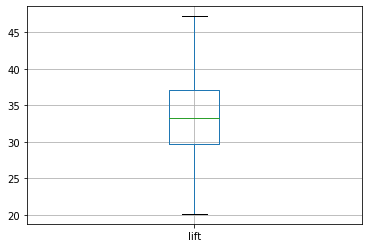

In [68]:
rules_l[['lift']].boxplot()

## All Category: Support + Confidence + Lift

In [69]:
final_rules_all = rules_c[ (rules_c['lift'] >= 20) & (rules_c['confidence'] >= 0.2) ]
final_rules_all

antecedents   consequents  antecedent support  consequent support  \
13    (festival)        (film)            0.008090            0.038652   
6   (chancellor)       (brown)            0.009888            0.021573   
9       (growth)     (economy)            0.009888            0.013483   
15       (phone)      (mobile)            0.014831            0.019326   
14      (mobile)       (phone)            0.019326            0.014831   
10     (economy)      (growth)            0.013483            0.009888   
5        (brown)  (chancellor)            0.021573            0.009888   

     support  confidence       lift  leverage  conviction  
13  0.006292    0.777778  20.122739  0.005979    4.326067  
6   0.007191    0.727273  33.712121  0.006978    3.587566  
9   0.006292    0.636364  47.196970  0.006159    2.712921  
15  0.009438    0.636364  32.928118  0.009152    2.696854  
14  0.009438    0.488372  32.928118  0.009152    1.925557  
10  0.006292    0.466667  47.196970  0.006159    1.856461  
5   0.007191    0.333333  33.712121  0.006978    1.485169

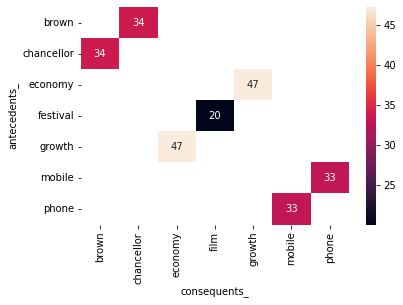

In [70]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import seaborn as sns
final_rules_all['lhs_items'] = final_rules_all['antecedents'].apply(lambda x:len(x) )
final_rules_all[final_rules_all['lhs_items']>0.5].sort_values('lift', ascending=False).head()
final_rules_all['antecedents_'] = final_rules_all['antecedents'].apply(lambda a: ','.join(list(a)))
final_rules_all['consequents_'] = final_rules_all['consequents'].apply(lambda a: ','.join(list(a)))
pivot = final_rules_all[final_rules_all['lhs_items']>0.5].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Sport Category 

In [71]:
df_sport = df[df.category=='sport']

In [72]:
df_sport.head()

category                                               text  \
2     sport  tigers wary of farrell  gamble  leicester say ...   
3     sport  yeading face newcastle in fa cup premiership s...   
7     sport  henman hopes ended in dubai third seed tim hen...   
8     sport  wilkinson fit to face edinburgh england captai...   
14    sport  moya emotional after davis cup win carlos moya...   

                                          parsed_text  \
2   tiger wary farrell gamble leicester rushed bid...   
3   yeading newcastle fa cup premiership newcastle...   
7   henman hope dubai third seed tim henman slumpe...   
8   wilkinson fit edinburgh england captain jonny ...   
14  moya emotional davis cup win carlos moya descr...   

                                        cleansed_text  \
2   tiger wary farrell gamble leicester rushed bid...   
3   yeading newcastle fa cup premiership newcastle...   
7   henman hope dubai third seed tim henman slumpe...   
8   wilkinson fit edinburgh england captain jonny ...   
14  moya emotional davis cup win carlos moya descr...   

                                       keywords_tfidf  \
2   {'farrell': 0.536, 'gamble': 0.316, 'leicester...   
3   {'yeading': 0.296, 'west': 0.156, 'scunthorpe'...   
7   {'henman': 0.565, 'raining': 0.239, 'seed': 0....   
8   {'wilkinson': 0.433, '25yearold': 0.224, 'inju...   
14  {'roddick': 0.375, 'moya': 0.345, 'davis': 0.2...   

                                             keywords  
2         [farrell, gamble, leicester, rugby, league]  
3     [yeading, west, scunthorpe, nonleague, watford]  
7           [henman, raining, seed, umpire, ljubicic]  
8   [wilkinson, 25yearold, injury, edinburgh, engl...  
14                [roddick, moya, davis, clay, spain]

In [73]:
sport_visualize = []
for row in df_sport['keywords']:
    for word in row:
        sport_visualize.append(word)

In [74]:
sport_visualize = pd.Series(sport_visualize)
sport_visualize.value_counts()

england         37
wale            26
chelsea         22
rugby           18
ireland         18
                ..
dropgoal         1
pelous           1
fiveyeardeal     1
mail             1
heerenveen       1
Length: 1236, dtype: int64

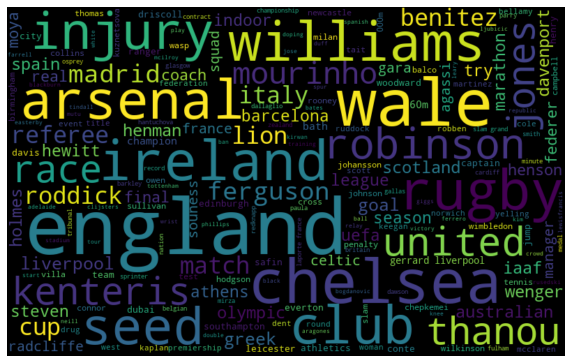

In [75]:
# # Word Cloud
listToStr = ' '.join([str(elem) for elem in sport_visualize])
wordcloud_creation(listToStr)

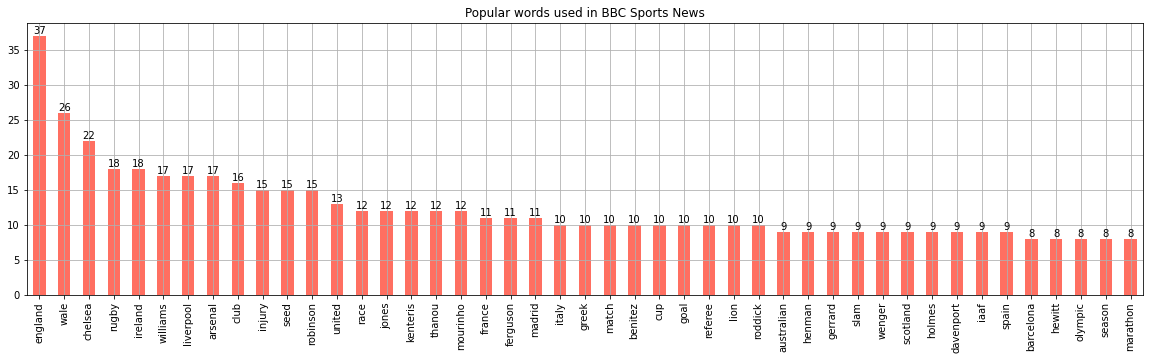

In [76]:
plt.figure(figsize=(20,5))
ax = sport_visualize.value_counts().head(45).plot.bar(color='#FF6F61')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Popular words used in BBC Sports News')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [77]:
sport_nested = []
for row in df_sport['keywords']:
    sport_nested.append(row)

In [78]:
sport_nested

[['farrell', 'gamble', 'leicester', 'rugby', 'league'],
 ['yeading', 'west', 'scunthorpe', 'nonleague', 'watford'],
 ['henman', 'raining', 'seed', 'umpire', 'ljubicic'],
 ['wilkinson', '25yearold', 'injury', 'edinburgh', 'england'],
 ['roddick', 'moya', 'davis', 'clay', 'spain'],
 ['connors', 'lta', 'manga', 'jimmy', 'coach'],
 ['bates', 'leeds', 'club', 'takeover', 'krasner'],
 ['villa', 'cole', 'carlton', 'leary', 'ankle'],
 ['moya', 'atp', 'relief', 'srichaphan', 'tournament'],
 ['federer', 'ljubicic', 'roger', 'dubai', 'suddenly'],
 ['kronberg', 'dorival', 'vivancos', 'scott', 'circuit'],
 ['lewsey', 'ball', 'try', 'disallowed', 'kaplan'],
 ['ranger', 'ferguson', 'blackburn', 'williams', 'transfer'],
 ['lion', 'henson', 'white', 'italy', 'driscoll'],
 ['kirwan', 'scotland', 'victory', 'stoica', 'simon'],
 ['robinson', 'australia', 'league', 'rugby', 'england'],
 ['hingis', 'miss', 'weingartner', 'thaliand', 'marlene'],
 ['student', 'rugby', 'welsh', 'representative', 'wale'],
 ['br

In [79]:
sport_transformed = transaction_encoder.fit(sport_nested).transform(sport_nested)

In [80]:
df_sport = pd.DataFrame(sport_transformed, columns = transaction_encoder.columns_)
df_sport.head()

000m   100m   10km  1500m  1970s   200m   225m  25yearold  30man   30th  \
0  False  False  False  False  False  False  False      False  False  False   
1  False  False  False  False  False  False  False      False  False  False   
2  False  False  False  False  False  False  False      False  False  False   
3  False  False  False  False  False  False  False       True  False  False   
4  False  False  False  False  False  False  False      False  False  False   

   ...  yachvili  yannick   yapp  yeading  yelling  zambia  zealand  zenden  \
0  ...     False    False  False    False    False   False    False   False   
1  ...     False    False  False     True    False   False    False   False   
2  ...     False    False  False    False    False   False    False   False   
3  ...     False    False  False    False    False   False    False   False   
4  ...     False    False  False    False    False   False    False   False   

   zidane  zvonareva  
0   False      False  
1   False      False  
2   False      False  
3   False      False  
4   False      False  

[5 rows x 1236 columns]

## Sport: Support Threshold

In [81]:
frequent_itemsets_sport = apriori(df_sport, min_support = 0.01, 
                                  use_colnames = True)
frequent_itemsets_sport

support                   itemsets
0    0.013699                      (60m)
1    0.013699                   (agassi)
2    0.033268                  (arsenal)
3    0.015656                   (athens)
4    0.011742                (athletics)
..        ...                        ...
96   0.013699             (iaaf, thanou)
97   0.019569         (kenteris, thanou)
98   0.011742      (iaaf, thanou, greek)
99   0.013699  (kenteris, thanou, greek)
100  0.011742   (iaaf, kenteris, thanou)

[101 rows x 2 columns]

In [82]:
frequent_itemsets_sport[['support']].describe()

support
count  101.000000
mean     0.018252
std      0.009041
min      0.011742
25%      0.013699
50%      0.015656
75%      0.019569
max      0.072407

## Sport: Confidence Threshold

In [83]:
rules_c = association_rules(frequent_itemsets_sport, metric="confidence", min_threshold=0.76)
rules_c

antecedents  consequents  antecedent support  consequent support  \
0           (benitez)  (liverpool)            0.019569            0.033268   
1              (gara)    (ireland)            0.013699            0.035225   
2           (gerrard)  (liverpool)            0.017613            0.033268   
3             (grand)       (slam)            0.011742            0.017613   
4             (greek)   (kenteris)            0.019569            0.023483   
5             (greek)     (thanou)            0.019569            0.023483   
6              (iaaf)   (kenteris)            0.017613            0.023483   
7              (iaaf)     (thanou)            0.017613            0.023483   
8          (kenteris)     (thanou)            0.023483            0.023483   
9            (thanou)   (kenteris)            0.023483            0.023483   
10     (iaaf, thanou)      (greek)            0.013699            0.019569   
11      (iaaf, greek)     (thanou)            0.011742            0.023483   
12  (kenteris, greek)     (thanou)            0.015656            0.023483   
13    (thanou, greek)   (kenteris)            0.017613            0.023483   
14   (iaaf, kenteris)     (thanou)            0.013699            0.023483   
15     (iaaf, thanou)   (kenteris)            0.013699            0.023483   

     support  confidence       lift  leverage  conviction  
0   0.015656    0.800000  24.047059  0.015005    4.833659  
1   0.013699    1.000000  28.388889  0.013216         inf  
2   0.015656    0.888889  26.718954  0.015070    8.700587  
3   0.011742    1.000000  56.777778  0.011535         inf  
4   0.015656    0.800000  34.066667  0.015196    4.882583  
5   0.017613    0.900000  38.325000  0.017153    9.765166  
6   0.013699    0.777778  33.120370  0.013285    4.394325  
7   0.013699    0.777778  33.120370  0.013285    4.394325  
8   0.019569    0.833333  35.486111  0.019018    5.859100  
9   0.019569    0.833333  35.486111  0.019018    5.859100  
10  0.011742    0.857143  43.800000  0.011474    6.863014  
11  0.011742    1.000000  42.583333  0.011466         inf  
12  0.013699    0.875000  37.260417  0.013331    7.812133  
13  0.013699    0.777778  33.120370  0.013285    4.394325  
14  0.011742    0.857143  36.500000  0.011420    6.835616  
15  0.011742    0.857143  36.500000  0.011420    6.835616

In [84]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

antecedents  consequents  antecedent support  consequent support  \
1              (gara)    (ireland)            0.013699            0.035225   
3             (grand)       (slam)            0.011742            0.017613   
11      (iaaf, greek)     (thanou)            0.011742            0.023483   
5             (greek)     (thanou)            0.019569            0.023483   
2           (gerrard)  (liverpool)            0.017613            0.033268   
12  (kenteris, greek)     (thanou)            0.015656            0.023483   
10     (iaaf, thanou)      (greek)            0.013699            0.019569   
14   (iaaf, kenteris)     (thanou)            0.013699            0.023483   
15     (iaaf, thanou)   (kenteris)            0.013699            0.023483   
8          (kenteris)     (thanou)            0.023483            0.023483   

     support  confidence       lift  leverage  conviction  
1   0.013699    1.000000  28.388889  0.013216         inf  
3   0.011742    1.000000  56.777778  0.011535         inf  
11  0.011742    1.000000  42.583333  0.011466         inf  
5   0.017613    0.900000  38.325000  0.017153    9.765166  
2   0.015656    0.888889  26.718954  0.015070    8.700587  
12  0.013699    0.875000  37.260417  0.013331    7.812133  
10  0.011742    0.857143  43.800000  0.011474    6.863014  
14  0.011742    0.857143  36.500000  0.011420    6.835616  
15  0.011742    0.857143  36.500000  0.011420    6.835616  
8   0.019569    0.833333  35.486111  0.019018    5.859100

<AxesSubplot:>

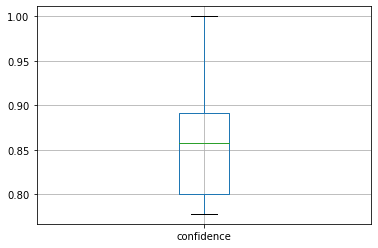

In [85]:
rules_c[['confidence']].boxplot()

## Sport: Lift Threshold

In [86]:
rules_l = association_rules(frequent_itemsets_sport, metric = 'lift', min_threshold = 37)
rules_l

antecedents        consequents  antecedent support  \
0             (grand)             (slam)            0.011742   
1              (slam)            (grand)            0.017613   
2            (thanou)            (greek)            0.023483   
3             (greek)           (thanou)            0.019569   
4      (iaaf, thanou)            (greek)            0.013699   
5       (iaaf, greek)           (thanou)            0.011742   
6     (thanou, greek)             (iaaf)            0.017613   
7              (iaaf)    (thanou, greek)            0.017613   
8            (thanou)      (iaaf, greek)            0.023483   
9             (greek)     (iaaf, thanou)            0.019569   
10  (kenteris, greek)           (thanou)            0.015656   
11           (thanou)  (kenteris, greek)            0.023483   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.017613  0.011742    1.000000  56.777778  0.011535         inf  
1             0.011742  0.011742    0.666667  56.777778  0.011535    2.964775  
2             0.019569  0.017613    0.750000  38.325000  0.017153    3.921722  
3             0.023483  0.017613    0.900000  38.325000  0.017153    9.765166  
4             0.019569  0.011742    0.857143  43.800000  0.011474    6.863014  
5             0.023483  0.011742    1.000000  42.583333  0.011466         inf  
6             0.017613  0.011742    0.666667  37.851852  0.011431    2.947162  
7             0.017613  0.011742    0.666667  37.851852  0.011431    2.947162  
8             0.011742  0.011742    0.500000  42.583333  0.011466    1.976517  
9             0.013699  0.011742    0.600000  43.800000  0.011474    2.465753  
10            0.023483  0.013699    0.875000  37.260417  0.013331    7.812133  
11            0.015656  0.013699    0.583333  37.260417  0.013331    2.362427

In [87]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

antecedents      consequents  antecedent support  consequent support  \
0          (grand)           (slam)            0.011742            0.017613   
1           (slam)          (grand)            0.017613            0.011742   
9          (greek)   (iaaf, thanou)            0.019569            0.013699   
4   (iaaf, thanou)          (greek)            0.013699            0.019569   
5    (iaaf, greek)         (thanou)            0.011742            0.023483   
8         (thanou)    (iaaf, greek)            0.023483            0.011742   
2         (thanou)          (greek)            0.023483            0.019569   
3          (greek)         (thanou)            0.019569            0.023483   
6  (thanou, greek)           (iaaf)            0.017613            0.017613   
7           (iaaf)  (thanou, greek)            0.017613            0.017613   

    support  confidence       lift  leverage  conviction  
0  0.011742    1.000000  56.777778  0.011535         inf  
1  0.011742    0.666667  56.777778  0.011535    2.964775  
9  0.011742    0.600000  43.800000  0.011474    2.465753  
4  0.011742    0.857143  43.800000  0.011474    6.863014  
5  0.011742    1.000000  42.583333  0.011466         inf  
8  0.011742    0.500000  42.583333  0.011466    1.976517  
2  0.017613    0.750000  38.325000  0.017153    3.921722  
3  0.017613    0.900000  38.325000  0.017153    9.765166  
6  0.011742    0.666667  37.851852  0.011431    2.947162  
7  0.011742    0.666667  37.851852  0.011431    2.947162

<AxesSubplot:>

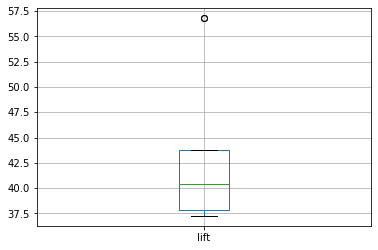

In [88]:
rules_l[['lift']].boxplot()

## Sport: Support + Confidence + Lift

In [89]:
final_rules_sport = rules_c[ (rules_c['lift'] >= 37) & (rules_c['confidence'] >= 0.76) ]
final_rules_sport

antecedents consequents  antecedent support  consequent support  \
3             (grand)      (slam)            0.011742            0.017613   
11      (iaaf, greek)    (thanou)            0.011742            0.023483   
5             (greek)    (thanou)            0.019569            0.023483   
12  (kenteris, greek)    (thanou)            0.015656            0.023483   
10     (iaaf, thanou)     (greek)            0.013699            0.019569   

     support  confidence       lift  leverage  conviction  
3   0.011742    1.000000  56.777778  0.011535         inf  
11  0.011742    1.000000  42.583333  0.011466         inf  
5   0.017613    0.900000  38.325000  0.017153    9.765166  
12  0.013699    0.875000  37.260417  0.013331    7.812133  
10  0.011742    0.857143  43.800000  0.011474    6.863014

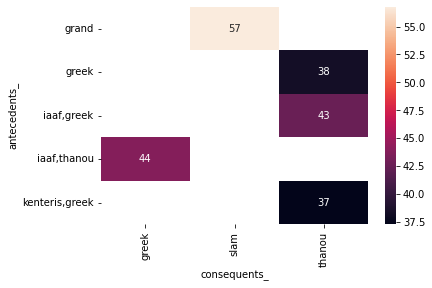

In [90]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import seaborn as sns
final_rules_sport['lhs_items'] = final_rules_sport['antecedents'].apply(lambda x:len(x) )
final_rules_sport[final_rules_sport['lhs_items']>0.5].sort_values('lift', ascending=False).head()
final_rules_sport['antecedents_'] = final_rules_sport['antecedents'].apply(lambda a: ','.join(list(a)))
final_rules_sport['consequents_'] = final_rules_sport['consequents'].apply(lambda a: ','.join(list(a)))
pivot = final_rules_sport[final_rules_sport['lhs_items']>0.5].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Business Category 

In [91]:
df_business = df[df.category=='business']

In [92]:
df_business.head()

category                                               text  \
1   business  worldcom boss  left books alone  former worldc...   
11  business  virgin blue shares plummet 20% shares in austr...   
12  business  crude oil prices back above $50 cold weather a...   
15  business  s korean credit card firm rescued south korea ...   
18  business  japanese banking battle at an end japan s sumi...   

                                          parsed_text  \
1   worldcom bos left book former worldcom bos ber...   
11  virgin blue share plummet share australian bud...   
12  crude oil price cold weather united europe pus...   
15  korean credit card firm rescued south korea la...   
18  japanese banking battle japan sumitomo mitsui ...   

                                        cleansed_text  \
1   worldcom bos left book former worldcom bos ber...   
11  virgin blue share plummet share australian bud...   
12  crude oil price cold weather united europe pus...   
15  korean credit card firm rescued south korea la...   
18  japanese banking battle japan sumitomo mitsui ...   

                                       keywords_tfidf  \
1   {'worldcom': 0.466, 'ebbers': 0.428, 'myers': ...   
11  {'virgin': 0.642, 'blue': 0.483, 'jetstar': 0....   
12  {'price': 0.353, 'crude': 0.347, 'oil': 0.338,...   
15  {'lg': 0.446, 'card': 0.328, 'creditor': 0.267...   
18  {'ufj': 0.583, 'sumitomo': 0.453, 'mitsubishi'...   

                                             keywords  
1   [worldcom, ebbers, myers, accounting, weingarten]  
11           [virgin, blue, jetstar, profit, airline]  
12                  [price, crude, oil, barrel, opec]  
15                  [lg, card, creditor, debt, korea]  
18           [ufj, sumitomo, mitsubishi, bank, japan]

In [93]:
business_visualize = []
for row in df_business['keywords']:
    for word in row:
        business_visualize.append(word)

In [94]:
business_visualize = pd.Series(business_visualize)
business_visualize.value_counts()

bank         32
economy      28
rate         23
oil          22
growth       22
             ..
smfg          1
daiwa         1
federated     1
macy          1
beijing       1
Length: 1305, dtype: int64

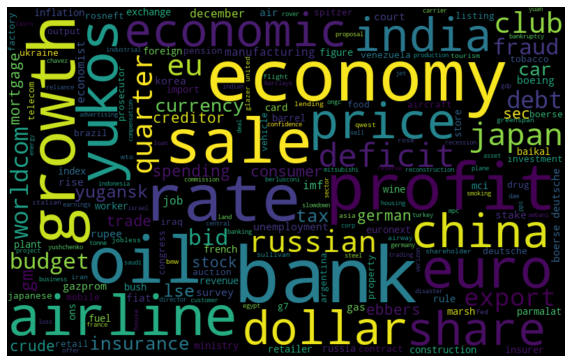

In [95]:
listToStr = ' '.join([str(elem) for elem in business_visualize])
wordcloud_creation(listToStr)

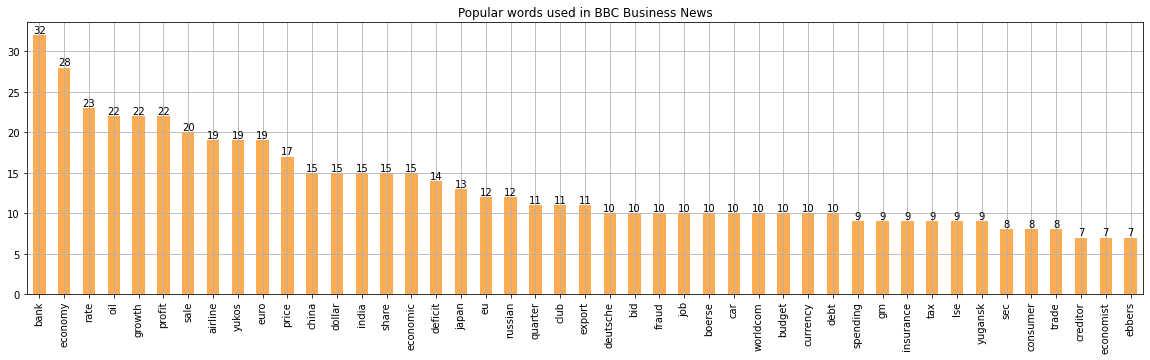

In [96]:
plt.figure(figsize=(20,5))
ax = business_visualize.value_counts().head(45).plot.bar(color='#FDAC53')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Popular words used in BBC Business News')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [97]:
business_nested = []
for row in df_business['keywords']:
    business_nested.append(row)

In [98]:
business_nested

[['worldcom', 'ebbers', 'myers', 'accounting', 'weingarten'],
 ['virgin', 'blue', 'jetstar', 'profit', 'airline'],
 ['price', 'crude', 'oil', 'barrel', 'opec'],
 ['lg', 'card', 'creditor', 'debt', 'korea'],
 ['ufj', 'sumitomo', 'mitsubishi', 'bank', 'japan'],
 ['marsh', 'spitzer', 'guilty', 'bewlay', 'insurance'],
 ['germany', 'economy', 'german', 'eurozone', 'quarter'],
 ['nationwide', 'price', 'bank', 'mortgage', 'housing'],
 ['japanese', 'japan', 'recovery', 'confidence', 'amidst'],
 ['bonus', 'withprofits', 'life', 'stock', 'insurer'],
 ['pernod', 'domecq', 'allied', 'seagram', 'whisky'],
 ['ukraine', 'yushchenko', 'viktor', 'eu', 'privatisation'],
 ['vioxx', 'merck', 'drug', 'fda', 'cox2'],
 ['telegraph', 'journalist', 'printing', 'newspaper', 'tabloid'],
 ['tobacco', '280bn', 'smoking', 'altria', 'court'],
 ['ntpc', 'india', 'power', 'share', 'flotation'],
 ['fiat', 'gm', 'stake', 'opel', 'sell'],
 ['indonesia', 'debt', 'paris', 'bakrie', 'club'],
 ['singapore', 'quarter', 'growt

In [99]:
business_transformed = transaction_encoder.fit(business_nested).transform(business_nested)

In [100]:
df_business = pd.DataFrame(business_transformed, columns = transaction_encoder.columns_)
df_business.head()

1026bn   168m   18bn  280bn   291m    2bn  368bn    42m   54bn    54m  ...  \
0   False  False  False  False  False  False  False  False  False  False  ...   
1   False  False  False  False  False  False  False  False  False  False  ...   
2   False  False  False  False  False  False  False  False  False  False  ...   
3   False  False  False  False  False  False  False  False  False  False  ...   
4   False  False  False  False  False  False  False  False  False  False  ...   

     yen   yili  yorkshire   yuan  yudhoyono  yugansk  yuganskneftegas  \
0  False  False      False  False      False    False            False   
1  False  False      False  False      False    False            False   
2  False  False      False  False      False    False            False   
3  False  False      False  False      False    False            False   
4  False  False      False  False      False    False            False   

   yuganskneftegaz  yukos  yushchenko  
0            False  False       False  
1            False  False       False  
2            False  False       False  
3            False  False       False  
4            False  False       False  

[5 rows x 1305 columns]

## Business: Support Threshold

In [101]:
frequent_itemsets_business = apriori(df_business,
                                     min_support = 0.01,
                                     use_colnames = True)
frequent_itemsets_business

support                   itemsets
0   0.011765                      (air)
1   0.037255                  (airline)
2   0.062745                     (bank)
3   0.011765               (bankruptcy)
4   0.019608                      (bid)
..       ...                        ...
79  0.011765         (yugansk, russian)
80  0.015686           (yukos, russian)
81  0.013725           (yugansk, yukos)
82  0.013725    (deutsche, boerse, lse)
83  0.011765  (worldcom, fraud, ebbers)

[84 rows x 2 columns]

In [170]:
frequent_itemsets_business[['support']].describe()

support
count  84.000000
mean    0.020098
std     0.010782
min     0.011765
25%     0.011765
50%     0.015686
75%     0.022059
max     0.062745

## Business: Confidence Threshold

In [102]:
rules_c = association_rules(frequent_itemsets_business, metric="confidence", min_threshold=0.76)
rules_c

antecedents         consequents  antecedent support  \
0           (deutsche)            (boerse)            0.019608   
1             (boerse)          (deutsche)            0.019608   
2             (boerse)               (lse)            0.019608   
3                (lse)            (boerse)            0.017647   
4             (glazer)              (club)            0.011765   
5                (lse)          (deutsche)            0.017647   
6             (ebbers)             (fraud)            0.013725   
7             (ebbers)          (worldcom)            0.013725   
8            (yugansk)             (yukos)            0.017647   
9   (boerse, deutsche)               (lse)            0.017647   
10     (deutsche, lse)            (boerse)            0.013725   
11       (boerse, lse)          (deutsche)            0.015686   
12               (lse)  (boerse, deutsche)            0.017647   
13   (fraud, worldcom)            (ebbers)            0.011765   
14  (ebbers, worldcom)             (fraud)            0.013725   
15     (fraud, ebbers)          (worldcom)            0.011765   
16            (ebbers)   (fraud, worldcom)            0.013725   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.019608  0.017647    0.900000  45.900000  0.017263    9.803922  
1             0.019608  0.017647    0.900000  45.900000  0.017263    9.803922  
2             0.017647  0.015686    0.800000  45.333333  0.015340    4.911765  
3             0.019608  0.015686    0.888889  45.333333  0.015340    8.823529  
4             0.021569  0.011765    1.000000  46.363636  0.011511         inf  
5             0.019608  0.013725    0.777778  39.666667  0.013379    4.411765  
6             0.019608  0.011765    0.857143  43.714286  0.011496    6.862745  
7             0.019608  0.013725    1.000000  51.000000  0.013456         inf  
8             0.037255  0.013725    0.777778  20.877193  0.013068    4.332353  
9             0.017647  0.013725    0.777778  44.074074  0.013414    4.420588  
10            0.019608  0.013725    1.000000  51.000000  0.013456         inf  
11            0.019608  0.013725    0.875000  44.625000  0.013418    7.843137  
12            0.017647  0.013725    0.777778  44.074074  0.013414    4.420588  
13            0.013725  0.011765    1.000000  72.857143  0.011603         inf  
14            0.019608  0.011765    0.857143  43.714286  0.011496    6.862745  
15            0.019608  0.011765    1.000000  51.000000  0.011534         inf  
16            0.011765  0.011765    0.857143  72.857143  0.011603    6.917647

In [103]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

antecedents consequents  antecedent support  consequent support  \
10     (deutsche, lse)    (boerse)            0.013725            0.019608   
15     (fraud, ebbers)  (worldcom)            0.011765            0.019608   
4             (glazer)      (club)            0.011765            0.021569   
13   (fraud, worldcom)    (ebbers)            0.011765            0.013725   
7             (ebbers)  (worldcom)            0.013725            0.019608   
0           (deutsche)    (boerse)            0.019608            0.019608   
1             (boerse)  (deutsche)            0.019608            0.019608   
3                (lse)    (boerse)            0.017647            0.019608   
11       (boerse, lse)  (deutsche)            0.015686            0.019608   
14  (ebbers, worldcom)     (fraud)            0.013725            0.019608   

     support  confidence       lift  leverage  conviction  
10  0.013725    1.000000  51.000000  0.013456         inf  
15  0.011765    1.000000  51.000000  0.011534         inf  
4   0.011765    1.000000  46.363636  0.011511         inf  
13  0.011765    1.000000  72.857143  0.011603         inf  
7   0.013725    1.000000  51.000000  0.013456         inf  
0   0.017647    0.900000  45.900000  0.017263    9.803922  
1   0.017647    0.900000  45.900000  0.017263    9.803922  
3   0.015686    0.888889  45.333333  0.015340    8.823529  
11  0.013725    0.875000  44.625000  0.013418    7.843137  
14  0.011765    0.857143  43.714286  0.011496    6.862745

<AxesSubplot:>

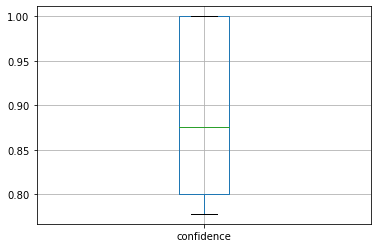

In [104]:
rules_c[['confidence']].boxplot()

## Business: Lift Threshold

In [105]:
rules_l = association_rules(frequent_itemsets_business, metric = 'lift', min_threshold = 50)
rules_l

antecedents        consequents  antecedent support  \
0         (worldcom)           (ebbers)            0.019608   
1           (ebbers)         (worldcom)            0.013725   
2    (deutsche, lse)           (boerse)            0.013725   
3           (boerse)    (deutsche, lse)            0.019608   
4  (fraud, worldcom)           (ebbers)            0.011765   
5    (fraud, ebbers)         (worldcom)            0.011765   
6         (worldcom)    (fraud, ebbers)            0.019608   
7           (ebbers)  (fraud, worldcom)            0.013725   

   consequent support   support  confidence       lift  leverage  conviction  
0            0.013725  0.013725    0.700000  51.000000  0.013456    3.287582  
1            0.019608  0.013725    1.000000  51.000000  0.013456         inf  
2            0.019608  0.013725    1.000000  51.000000  0.013456         inf  
3            0.013725  0.013725    0.700000  51.000000  0.013456    3.287582  
4            0.013725  0.011765    1.000000  72.857143  0.011603         inf  
5            0.019608  0.011765    1.000000  51.000000  0.011534         inf  
6            0.011765  0.011765    0.600000  51.000000  0.011534    2.470588  
7            0.011765  0.011765    0.857143  72.857143  0.011603    6.917647

In [106]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

antecedents        consequents  antecedent support  \
4  (fraud, worldcom)           (ebbers)            0.011765   
7           (ebbers)  (fraud, worldcom)            0.013725   
0         (worldcom)           (ebbers)            0.019608   
1           (ebbers)         (worldcom)            0.013725   
2    (deutsche, lse)           (boerse)            0.013725   
3           (boerse)    (deutsche, lse)            0.019608   
5    (fraud, ebbers)         (worldcom)            0.011765   
6         (worldcom)    (fraud, ebbers)            0.019608   

   consequent support   support  confidence       lift  leverage  conviction  
4            0.013725  0.011765    1.000000  72.857143  0.011603         inf  
7            0.011765  0.011765    0.857143  72.857143  0.011603    6.917647  
0            0.013725  0.013725    0.700000  51.000000  0.013456    3.287582  
1            0.019608  0.013725    1.000000  51.000000  0.013456         inf  
2            0.019608  0.013725    1.000000  51.000000  0.013456         inf  
3            0.013725  0.013725    0.700000  51.000000  0.013456    3.287582  
5            0.019608  0.011765    1.000000  51.000000  0.011534         inf  
6            0.011765  0.011765    0.600000  51.000000  0.011534    2.470588

<AxesSubplot:>

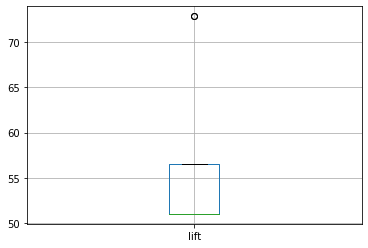

In [107]:
rules_l[['lift']].boxplot()

## Business: Support + Confidence + Lift

In [108]:
final_rules_business = rules_c[ (rules_c['lift'] >= 50) & (rules_c['confidence'] >= 0.76) ]
final_rules_business

antecedents        consequents  antecedent support  \
10    (deutsche, lse)           (boerse)            0.013725   
15    (fraud, ebbers)         (worldcom)            0.011765   
13  (fraud, worldcom)           (ebbers)            0.011765   
7            (ebbers)         (worldcom)            0.013725   
16           (ebbers)  (fraud, worldcom)            0.013725   

    consequent support   support  confidence       lift  leverage  conviction  
10            0.019608  0.013725    1.000000  51.000000  0.013456         inf  
15            0.019608  0.011765    1.000000  51.000000  0.011534         inf  
13            0.013725  0.011765    1.000000  72.857143  0.011603         inf  
7             0.019608  0.013725    1.000000  51.000000  0.013456         inf  
16            0.011765  0.011765    0.857143  72.857143  0.011603    6.917647

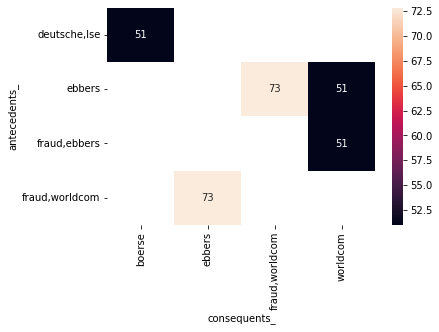

In [109]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import seaborn as sns
final_rules_business['lhs_items'] = final_rules_business['antecedents'].apply(lambda x:len(x) )
final_rules_business[final_rules_business['lhs_items']>0.5].sort_values('lift', ascending=False).head()
final_rules_business['antecedents_'] = final_rules_business['antecedents'].apply(lambda a: ','.join(list(a)))
final_rules_business['consequents_'] = final_rules_business['consequents'].apply(lambda a: ','.join(list(a)))
pivot = final_rules_business[final_rules_business['lhs_items']>0.5].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Politics Category 

In [110]:
df_politics = df[df.category=='politics']

In [111]:
df_politics.head()

category                                               text  \
5   politics  howard hits back at mongrel jibe michael howar...   
6   politics  blair prepares to name poll date tony blair is...   
13  politics  hague  given up  his pm ambition former conser...   
16  politics  howard backs stem cell research michael howard...   
28  politics  terror suspects face house arrest uk citizens ...   

                                          parsed_text  \
5   howard hit mongrel jibe michael howard claim p...   
6   blair prepares name poll date tony blair name ...   
13  hague pm ambition former conservative leader w...   
16  howard stem cell research michael howard stem ...   
28  terror suspect house arrest uk citizen suspect...   

                                        cleansed_text  \
5   howard hit mongrel jibe michael howard claim p...   
6   blair prepares name poll date tony blair name ...   
13  hague pm ambition former conservative leader w...   
16  howard stem cell research michael howard stem ...   
28  terror suspect house arrest uk citizen suspect...   

                                       keywords_tfidf  \
5   {'howard': 0.461, 'mongrel': 0.266, 'rattled':...   
6   {'parliament': 0.339, 'election': 0.322, 'blai...   
13  {'hague': 0.745, 'ambition': 0.166, 'party': 0...   
16  {'cell': 0.451, 'stem': 0.388, 'tissue': 0.222...   
28  {'terror': 0.271, 'clarke': 0.266, 'law': 0.23...   

                                           keywords  
5           [howard, mongrel, rattled, hain, party]  
6   [parliament, election, blair, easter, dissolve]  
13           [hague, ambition, party, front, bench]  
16           [cell, stem, tissue, research, howard]  
28            [terror, clarke, law, suspect, human]

In [112]:
politics_visualize = []
for row in df_politics['keywords']:
    for word in row:
        politics_visualize.append(word)

In [113]:
politics_visualize = pd.Series(politics_visualize)
politics_visualize.value_counts()

labour        52
blair         50
election      46
brown         44
party         36
              ..
evacuate       1
harry          1
nazi           1
apologised     1
sheriff        1
Length: 971, dtype: int64

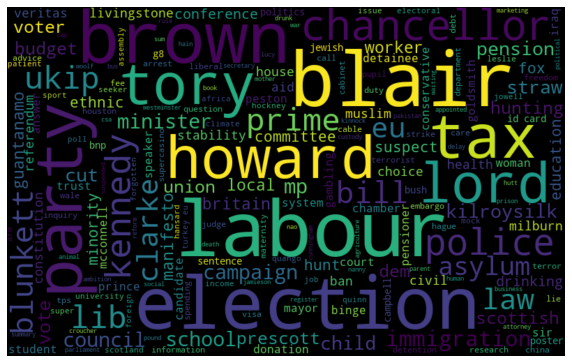

In [114]:
listToStr = ' '.join([str(elem) for elem in politics_visualize])
wordcloud_creation(listToStr)

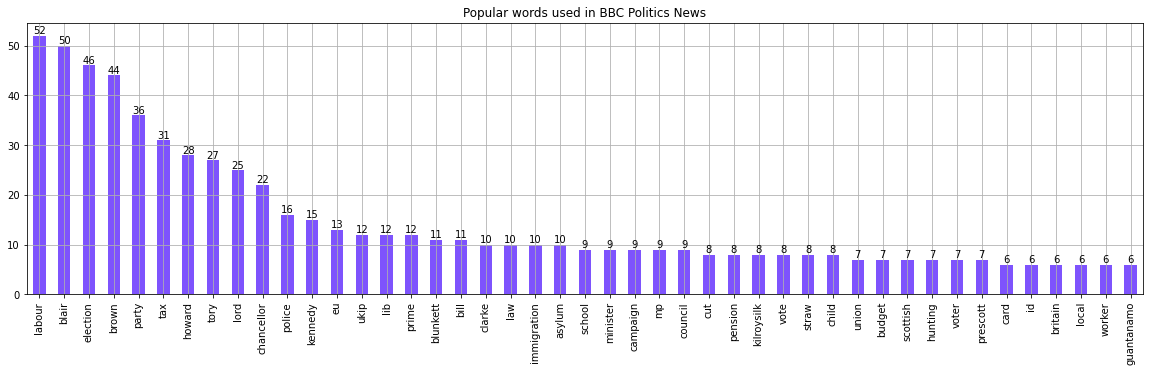

In [115]:
plt.figure(figsize=(20,5))
ax = politics_visualize.value_counts().head(45).plot.bar(color='#7e53fd')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Popular words used in BBC Politics News')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [116]:
politics_nested = []
for row in df_politics['keywords']:
    politics_nested.append(row)

In [117]:
politics_nested

[['howard', 'mongrel', 'rattled', 'hain', 'party'],
 ['parliament', 'election', 'blair', 'easter', 'dissolve'],
 ['hague', 'ambition', 'party', 'front', 'bench'],
 ['cell', 'stem', 'tissue', 'research', 'howard'],
 ['terror', 'clarke', 'law', 'suspect', 'human'],
 ['bowles', 'prince', 'parker', 'charles', 'engagement'],
 ['sayeed', 'mp', 'midbedfordshire', 'deselect', 'privilege'],
 ['donation', 'party', 'cap', 'election', 'political'],
 ['truant', 'school', 'pupil', 'education', 'truancy'],
 ['jamieson', 'club', 'sectarianism', 'ranger', 'celtic'],
 ['tps', 'party', 'marketing', 'call', 'intention'],
 ['child', 'aynsleygreen', 'prof', 'oxford', 'appointed'],
 ['pension', 'union', 'worker', 'strike', 'scheme'],
 ['winter', 'insulation', 'pensioner', 'voucher', 'energy'],
 ['hutt', 'gibbon', 'waiting', 'wale', 'dr'],
 ['donation', 'party', 'sum', 'totalling', 'chest'],
 ['straw', 'bus', 'kashmiri', 'kashmir', 'pakistan'],
 ['hague', 'ambition', 'party', 'front', 'bench'],
 ['immunisatio

In [118]:
politics_transformed = transaction_encoder.fit(politics_nested).transform(politics_nested)

In [119]:
df_politics = pd.DataFrame(politics_transformed, columns = transaction_encoder.columns_)
df_politics.head()

18rated  20yearolds  24hour   35bn   500m    80m  abbas  abortion  accept  \
0    False       False   False  False  False  False  False     False   False   
1    False       False   False  False  False  False  False     False   False   
2    False       False   False  False  False  False  False     False   False   
3    False       False   False  False  False  False  False     False   False   
4    False       False   False  False  False  False  False     False   False   

   acceptance  ...  whitefield  whitehall  winter  withdrawal  witness  woman  \
0       False  ...       False      False   False       False    False  False   
1       False  ...       False      False   False       False    False  False   
2       False  ...       False      False   False       False    False  False   
3       False  ...       False      False   False       False    False  False   
4       False  ...       False      False   False       False    False  False   

   woolf   word  worker  wyatt  
0  False  False   False  False  
1  False  False   False  False  
2  False  False   False  False  
3  False  False   False  False  
4  False  False   False  False  

[5 rows x 971 columns]

## Politics: Support Threshold

In [120]:
frequent_itemsets_politics = apriori(df_politics,
                                     min_support = 0.01,
                                     use_colnames = True)
frequent_itemsets_politics

support                   itemsets
0    0.011990                      (aid)
1    0.023981                   (asylum)
2    0.011990                      (ban)
3    0.026379                     (bill)
4    0.119904                    (blair)
..        ...                        ...
114  0.019185     (brown, blair, labour)
115  0.011990      (brown, prime, blair)
116  0.014388   (brown, chancellor, tax)
117  0.011990  (brown, election, labour)
118  0.011990  (ukip, kilroysilk, party)

[119 rows x 2 columns]

In [171]:
frequent_itemsets_politics[['support']].describe()

support
count  119.000000
mean     0.023034
std      0.021685
min      0.011990
25%      0.011990
50%      0.014388
75%      0.021583
max      0.124700

## Politics: Confidence Threshold

In [121]:
rules_c = association_rules(frequent_itemsets_politics, metric="confidence", min_threshold=0.76)
rules_c

antecedents     consequents  antecedent support  \
0           (stability)         (brown)            0.011990   
1                  (id)          (card)            0.014388   
2                (card)            (id)            0.014388   
3        (constitution)    (referendum)            0.011990   
4          (referendum)  (constitution)            0.011990   
5              (ethnic)      (minority)            0.011990   
6            (minority)        (ethnic)            0.011990   
7                (hunt)       (hunting)            0.011990   
8             (milburn)        (labour)            0.011990   
9              (worker)         (union)            0.014388   
10       (brown, prime)         (blair)            0.014388   
11    (chancellor, tax)         (brown)            0.016787   
12   (ukip, kilroysilk)         (party)            0.014388   
13  (kilroysilk, party)          (ukip)            0.011990   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.105516  0.011990    1.000000   9.477273  0.010725         inf  
1             0.014388  0.014388    1.000000  69.500000  0.014181         inf  
2             0.014388  0.014388    1.000000  69.500000  0.014181         inf  
3             0.011990  0.011990    1.000000  83.400000  0.011847         inf  
4             0.011990  0.011990    1.000000  83.400000  0.011847         inf  
5             0.011990  0.011990    1.000000  83.400000  0.011847         inf  
6             0.011990  0.011990    1.000000  83.400000  0.011847         inf  
7             0.016787  0.011990    1.000000  59.571429  0.011789         inf  
8             0.124700  0.011990    1.000000   8.019231  0.010495         inf  
9             0.016787  0.011990    0.833333  49.642857  0.011749    5.899281  
10            0.119904  0.011990    0.833333   6.950000  0.010265    5.280576  
11            0.105516  0.014388    0.857143   8.123377  0.012617    6.261391  
12            0.086331  0.011990    0.833333   9.652778  0.010748    5.482014  
13            0.028777  0.011990    1.000000  34.750000  0.011645         inf

In [122]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

antecedents     consequents  antecedent support  \
0           (stability)         (brown)            0.011990   
1                  (id)          (card)            0.014388   
2                (card)            (id)            0.014388   
3        (constitution)    (referendum)            0.011990   
4          (referendum)  (constitution)            0.011990   
5              (ethnic)      (minority)            0.011990   
6            (minority)        (ethnic)            0.011990   
7                (hunt)       (hunting)            0.011990   
8             (milburn)        (labour)            0.011990   
13  (kilroysilk, party)          (ukip)            0.011990   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.105516  0.011990         1.0   9.477273  0.010725         inf  
1             0.014388  0.014388         1.0  69.500000  0.014181         inf  
2             0.014388  0.014388         1.0  69.500000  0.014181         inf  
3             0.011990  0.011990         1.0  83.400000  0.011847         inf  
4             0.011990  0.011990         1.0  83.400000  0.011847         inf  
5             0.011990  0.011990         1.0  83.400000  0.011847         inf  
6             0.011990  0.011990         1.0  83.400000  0.011847         inf  
7             0.016787  0.011990         1.0  59.571429  0.011789         inf  
8             0.124700  0.011990         1.0   8.019231  0.010495         inf  
13            0.028777  0.011990         1.0  34.750000  0.011645         inf

<AxesSubplot:>

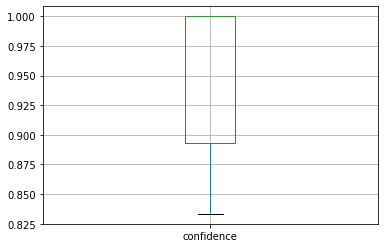

In [123]:
rules_c[['confidence']].boxplot()

## Politics: Lift Threshold

In [124]:
rules_l = association_rules(frequent_itemsets_politics, metric = 'lift', min_threshold = 60)
rules_l

antecedents     consequents  antecedent support  consequent support  \
0            (id)          (card)            0.014388            0.014388   
1          (card)            (id)            0.014388            0.014388   
2  (constitution)    (referendum)            0.011990            0.011990   
3    (referendum)  (constitution)            0.011990            0.011990   
4        (ethnic)      (minority)            0.011990            0.011990   
5      (minority)        (ethnic)            0.011990            0.011990   

    support  confidence  lift  leverage  conviction  
0  0.014388         1.0  69.5  0.014181         inf  
1  0.014388         1.0  69.5  0.014181         inf  
2  0.011990         1.0  83.4  0.011847         inf  
3  0.011990         1.0  83.4  0.011847         inf  
4  0.011990         1.0  83.4  0.011847         inf  
5  0.011990         1.0  83.4  0.011847         inf

In [125]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

antecedents     consequents  antecedent support  consequent support  \
2  (constitution)    (referendum)            0.011990            0.011990   
3    (referendum)  (constitution)            0.011990            0.011990   
4        (ethnic)      (minority)            0.011990            0.011990   
5      (minority)        (ethnic)            0.011990            0.011990   
0            (id)          (card)            0.014388            0.014388   
1          (card)            (id)            0.014388            0.014388   

    support  confidence  lift  leverage  conviction  
2  0.011990         1.0  83.4  0.011847         inf  
3  0.011990         1.0  83.4  0.011847         inf  
4  0.011990         1.0  83.4  0.011847         inf  
5  0.011990         1.0  83.4  0.011847         inf  
0  0.014388         1.0  69.5  0.014181         inf  
1  0.014388         1.0  69.5  0.014181         inf

<AxesSubplot:>

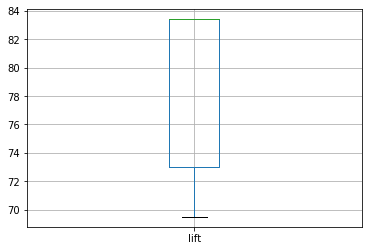

In [126]:
rules_l[['lift']].boxplot()

## Politics: Support + Confidence + Lift

In [127]:
final_rules_politics = rules_c[ (rules_c['lift'] >= 60) & (rules_c['confidence'] >= 0.76) ]
final_rules_politics

antecedents     consequents  antecedent support  consequent support  \
1            (id)          (card)            0.014388            0.014388   
2          (card)            (id)            0.014388            0.014388   
3  (constitution)    (referendum)            0.011990            0.011990   
4    (referendum)  (constitution)            0.011990            0.011990   
5        (ethnic)      (minority)            0.011990            0.011990   
6      (minority)        (ethnic)            0.011990            0.011990   

    support  confidence  lift  leverage  conviction  
1  0.014388         1.0  69.5  0.014181         inf  
2  0.014388         1.0  69.5  0.014181         inf  
3  0.011990         1.0  83.4  0.011847         inf  
4  0.011990         1.0  83.4  0.011847         inf  
5  0.011990         1.0  83.4  0.011847         inf  
6  0.011990         1.0  83.4  0.011847         inf

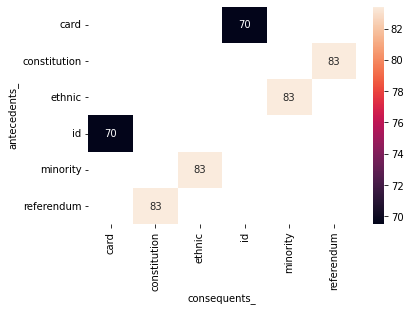

In [128]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import seaborn as sns
final_rules_politics['lhs_items'] = final_rules_politics['antecedents'].apply(lambda x:len(x) )
final_rules_politics[final_rules_politics['lhs_items']>0.5].sort_values('lift', ascending=False).head()
final_rules_politics['antecedents_'] = final_rules_politics['antecedents'].apply(lambda a: ','.join(list(a)))
final_rules_politics['consequents_'] = final_rules_politics['consequents'].apply(lambda a: ','.join(list(a)))
pivot = final_rules_politics[final_rules_politics['lhs_items']>0.5].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Tech Category 

In [129]:
df_tech = df[df.category=='tech']

In [130]:
df_tech.head()

category                                               text  \
0      tech  tv future in the hands of viewers with home th...   
19     tech  games maker fights for survival one of britain...   
20     tech  security warning over  fbi virus  the us feder...   
21     tech  halo 2 heralds traffic explosion the growing p...   
24     tech  mobile audio enters new dimension as mobile ph...   

                                          parsed_text  \
0   tv future hand viewer home theatre system plas...   
19  game maker fight survival britain largest inde...   
20  security warning fbi virus federal bureau inve...   
21  halo herald traffic explosion growing populari...   
24  mobile audio enters dimension mobile phone mov...   

                                        cleansed_text  \
0   tv future hand viewer home theatre system plas...   
19  game maker fight survival britain largest inde...   
20  security warning fbi virus federal bureau inve...   
21  halo herald traffic explosion growing populari...   
24  mobile audio enters dimension mobile phone mov...   

                                       keywords_tfidf  \
0   {'tv': 0.382, 'dvr': 0.245, 'brand': 0.223, 'h...   
19  {'argonaut': 0.745, 'administrator': 0.194, 'c...   
20  {'fbi': 0.506, 'recipient': 0.33, 'email': 0.3...   
21  {'bandwidth': 0.314, 'traffic': 0.311, 'networ...   
24  {'sonaptic': 0.381, 'sound': 0.319, 'mobile': ...   

                                         keywords  
0               [tv, dvr, brand, hanlon, channel]  
19  [argonaut, administrator, cash, save, london]  
20     [fbi, recipient, email, virus, attachment]  
21  [bandwidth, traffic, network, sandvine, halo]  
24   [sonaptic, sound, mobile, audio, technology]

In [131]:
tech_visualize = []
for row in df_tech['keywords']:
    for word in row:
        tech_visualize.append(word)

In [132]:
tech_visualize = pd.Series(tech_visualize)
tech_visualize.value_counts()

mobile        39
phone         31
software      26
microsoft     24
technology    19
              ..
cj             1
modem          1
star           1
ewoks          1
edgware        1
Length: 893, dtype: int64

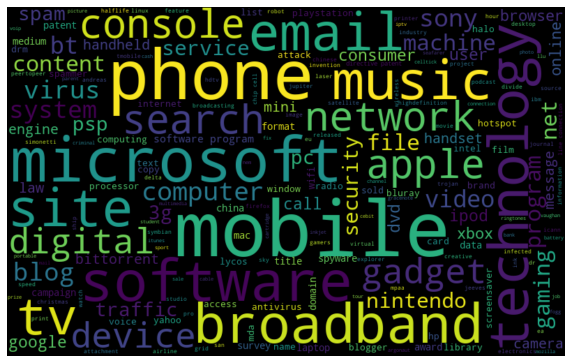

In [133]:
listToStr = ' '.join([str(elem) for elem in tech_visualize])
wordcloud_creation(listToStr)

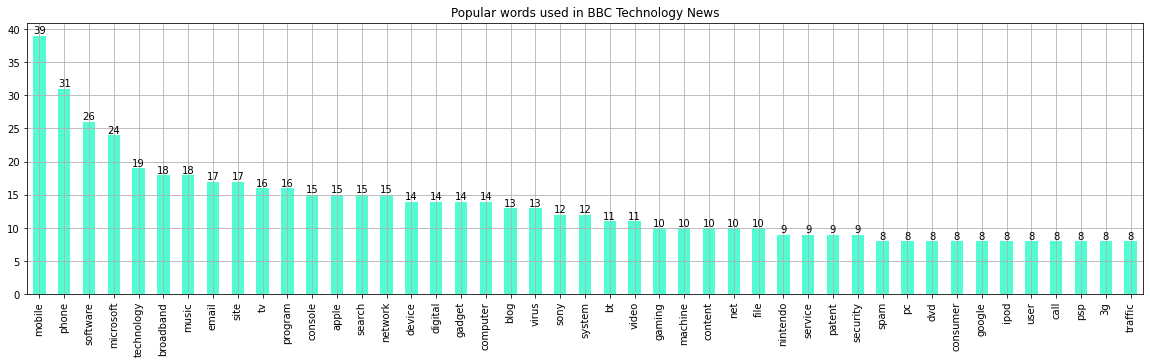

In [134]:
plt.figure(figsize=(20,5))
ax = tech_visualize.value_counts().head(45).plot.bar(color='#53fdd3')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Popular words used in BBC Technology News')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [135]:
tech_nested = []
for row in df_tech['keywords']:
    tech_nested.append(row)

In [136]:
tech_nested

[['tv', 'dvr', 'brand', 'hanlon', 'channel'],
 ['argonaut', 'administrator', 'cash', 'save', 'london'],
 ['fbi', 'recipient', 'email', 'virus', 'attachment'],
 ['bandwidth', 'traffic', 'network', 'sandvine', 'halo'],
 ['sonaptic', 'sound', 'mobile', 'audio', 'technology'],
 ['3g', 'phone', 'gig', 'mobile', 'video'],
 ['firefox', 'browser', 'explorer', 'microsoft', 'mozilla'],
 ['console', 'nintendo', 'ship', 'sony', 'psp'],
 ['panda', 'wolong', 'reserve', 'network', 'wireless'],
 ['bt', 'broadband', 'line', 'connection', 'llu'],
 ['blog', 'msn', 'blogging', 'journal', 'microsoft'],
 ['motorsport', 'tansley', 'disabled', 'car', 'pedal'],
 ['sky', 'card', 'box', 'loyalty', 'whalley'],
 ['hiphop', 'millan', 'rap', 'latinohiphopradiocom', 'spanish'],
 ['screensaver', 'spam', 'lycos', 'pollmann', 'site'],
 ['patent', 'ibm', 'software', 'intellectual', 'jollans'],
 ['seafarer', 'card', 'biometric', 'crystal', 'ship'],
 ['nem', 'digital', 'content', 'drm', 'medium'],
 ['slug', 'metal', '2d', 

In [137]:
tech_transformed = transaction_encoder.fit(tech_nested).transform(tech_nested)

In [138]:
df_tech = pd.DataFrame(tech_transformed, columns = transaction_encoder.columns_)
df_tech.head()

2d    2d3   3ami     3g   80gb  8mbps  access  account  acrobatic  \
0  False  False  False  False  False  False   False    False      False   
1  False  False  False  False  False  False   False    False      False   
2  False  False  False  False  False  False   False    False      False   
3  False  False  False  False  False  False   False    False      False   
4  False  False  False  False  False  False   False    False      False   

     act  ...   worm  writer   wsis  wyver   xbox  xboxes     xp  yahoo  \
0  False  ...  False   False  False  False  False   False  False  False   
1  False  ...  False   False  False  False  False   False  False  False   
2  False  ...  False   False  False  False  False   False  False  False   
3  False  ...  False   False  False  False  False   False  False  False   
4  False  ...  False   False  False  False  False   False  False  False   

    yang  yoran  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False  

[5 rows x 893 columns]

## Tech: Support Threshold

In [139]:
frequent_itemsets_tech = apriori(df_tech,
                                 min_support = 0.01,
                                 use_colnames = True)
frequent_itemsets_tech

support             itemsets
0   0.019950                 (3g)
1   0.037406              (apple)
2   0.012469              (award)
3   0.014963         (bittorrent)
4   0.032419               (blog)
..       ...                  ...
91  0.052369      (mobile, phone)
92  0.012469   (patent, software)
93  0.019950  (program, software)
94  0.012469   (program, spyware)
95  0.012469          (psp, sony)

[96 rows x 2 columns]

In [172]:
frequent_itemsets_tech[['support']].describe()

support
count  96.000000
mean    0.023405
std     0.015086
min     0.012469
25%     0.012469
50%     0.019950
75%     0.028055
max     0.097257

## Tech: Confidence Threshold

In [140]:
rules_c = association_rules(frequent_itemsets_tech, metric="confidence", min_threshold=0.70)
rules_c

antecedents  consequents  antecedent support  consequent support  \
0   (connection)  (broadband)            0.012469            0.044888   
1       (camera)      (phone)            0.014963            0.077307   
2         (xbox)    (console)            0.017456            0.037406   
3    (directive)     (patent)            0.012469            0.022444   
4       (engine)     (search)            0.014963            0.037406   
5     (handheld)   (nintendo)            0.014963            0.022444   
6      (handset)     (mobile)            0.014963            0.097257   
7          (law)     (patent)            0.014963            0.022444   
8          (mac)       (mini)            0.012469            0.014963   
9         (mini)        (mac)            0.014963            0.012469   
10     (spyware)    (program)            0.012469            0.039900   

     support  confidence       lift  leverage  conviction  
0   0.012469    1.000000  22.277778  0.011909         inf  
1   0.012469    0.833333  10.779570  0.011312    5.536160  
2   0.012469    0.714286  19.095238  0.011816    3.369077  
3   0.012469    1.000000  44.555556  0.012189         inf  
4   0.012469    0.833333  22.277778  0.011909    5.775561  
5   0.012469    0.833333  37.129630  0.012133    5.865337  
6   0.012469    0.833333   8.568376  0.011014    5.416459  
7   0.012469    0.833333  37.129630  0.012133    5.865337  
8   0.012469    1.000000  66.833333  0.012282         inf  
9   0.012469    0.833333  66.833333  0.012282    5.925187  
10  0.012469    1.000000  25.062500  0.011971         inf

In [141]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

antecedents  consequents  antecedent support  consequent support  \
0   (connection)  (broadband)            0.012469            0.044888   
3    (directive)     (patent)            0.012469            0.022444   
8          (mac)       (mini)            0.012469            0.014963   
10     (spyware)    (program)            0.012469            0.039900   
1       (camera)      (phone)            0.014963            0.077307   
4       (engine)     (search)            0.014963            0.037406   
5     (handheld)   (nintendo)            0.014963            0.022444   
6      (handset)     (mobile)            0.014963            0.097257   
7          (law)     (patent)            0.014963            0.022444   
9         (mini)        (mac)            0.014963            0.012469   

     support  confidence       lift  leverage  conviction  
0   0.012469    1.000000  22.277778  0.011909         inf  
3   0.012469    1.000000  44.555556  0.012189         inf  
8   0.012469    1.000000  66.833333  0.012282         inf  
10  0.012469    1.000000  25.062500  0.011971         inf  
1   0.012469    0.833333  10.779570  0.011312    5.536160  
4   0.012469    0.833333  22.277778  0.011909    5.775561  
5   0.012469    0.833333  37.129630  0.012133    5.865337  
6   0.012469    0.833333   8.568376  0.011014    5.416459  
7   0.012469    0.833333  37.129630  0.012133    5.865337  
9   0.012469    0.833333  66.833333  0.012282    5.925187

<AxesSubplot:>

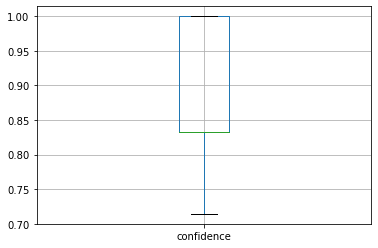

In [142]:
rules_c[['confidence']].boxplot()

## Tech: Lift Threshold

In [143]:
rules_l = association_rules(frequent_itemsets_tech, metric = 'lift', min_threshold = 30)
rules_l

antecedents  consequents  antecedent support  consequent support   support  \
0  (directive)     (patent)            0.012469            0.022444  0.012469   
1     (patent)  (directive)            0.022444            0.012469  0.012469   
2   (nintendo)   (handheld)            0.022444            0.014963  0.012469   
3   (handheld)   (nintendo)            0.014963            0.022444  0.012469   
4        (law)     (patent)            0.014963            0.022444  0.012469   
5     (patent)        (law)            0.022444            0.014963  0.012469   
6        (mac)       (mini)            0.012469            0.014963  0.012469   
7       (mini)        (mac)            0.014963            0.012469  0.012469   

   confidence       lift  leverage  conviction  
0    1.000000  44.555556  0.012189         inf  
1    0.555556  44.555556  0.012189    2.221945  
2    0.555556  37.129630  0.012133    2.216334  
3    0.833333  37.129630  0.012133    5.865337  
4    0.833333  37.129630  0.012133    5.865337  
5    0.555556  37.129630  0.012133    2.216334  
6    1.000000  66.833333  0.012282         inf  
7    0.833333  66.833333  0.012282    5.925187

In [144]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

antecedents  consequents  antecedent support  consequent support   support  \
6        (mac)       (mini)            0.012469            0.014963  0.012469   
7       (mini)        (mac)            0.014963            0.012469  0.012469   
0  (directive)     (patent)            0.012469            0.022444  0.012469   
1     (patent)  (directive)            0.022444            0.012469  0.012469   
2   (nintendo)   (handheld)            0.022444            0.014963  0.012469   
3   (handheld)   (nintendo)            0.014963            0.022444  0.012469   
4        (law)     (patent)            0.014963            0.022444  0.012469   
5     (patent)        (law)            0.022444            0.014963  0.012469   

   confidence       lift  leverage  conviction  
6    1.000000  66.833333  0.012282         inf  
7    0.833333  66.833333  0.012282    5.925187  
0    1.000000  44.555556  0.012189         inf  
1    0.555556  44.555556  0.012189    2.221945  
2    0.555556  37.129630  0.012133    2.216334  
3    0.833333  37.129630  0.012133    5.865337  
4    0.833333  37.129630  0.012133    5.865337  
5    0.555556  37.129630  0.012133    2.216334

<AxesSubplot:>

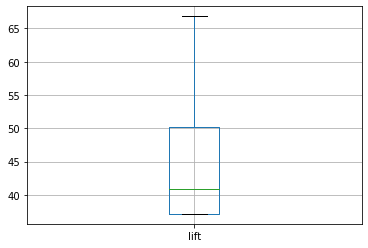

In [145]:
rules_l[['lift']].boxplot()

## Tech: Support + Confidence + Lift

In [146]:
final_rules_tech = rules_c[ (rules_c['lift'] >= 30) & (rules_c['confidence'] >= 0.70) ]
final_rules_tech

antecedents consequents  antecedent support  consequent support   support  \
3  (directive)    (patent)            0.012469            0.022444  0.012469   
8        (mac)      (mini)            0.012469            0.014963  0.012469   
5   (handheld)  (nintendo)            0.014963            0.022444  0.012469   
7        (law)    (patent)            0.014963            0.022444  0.012469   
9       (mini)       (mac)            0.014963            0.012469  0.012469   

   confidence       lift  leverage  conviction  
3    1.000000  44.555556  0.012189         inf  
8    1.000000  66.833333  0.012282         inf  
5    0.833333  37.129630  0.012133    5.865337  
7    0.833333  37.129630  0.012133    5.865337  
9    0.833333  66.833333  0.012282    5.925187

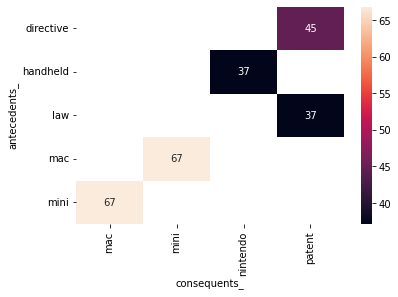

In [147]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import seaborn as sns
final_rules_tech['lhs_items'] = final_rules_tech['antecedents'].apply(lambda x:len(x) )
final_rules_tech[final_rules_tech['lhs_items']>0.5].sort_values('lift', ascending=False).head()
final_rules_tech['antecedents_'] = final_rules_tech['antecedents'].apply(lambda a: ','.join(list(a)))
final_rules_tech['consequents_'] = final_rules_tech['consequents'].apply(lambda a: ','.join(list(a)))
pivot = final_rules_tech[final_rules_tech['lhs_items']>0.5].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Entertainment Category 

In [148]:
df_entertainment = df[df.category=='entertainment']

In [149]:
df_entertainment.head()

category                                               text  \
4   entertainment  ocean s twelve raids box office ocean s twelve...   
9   entertainment  last star wars  not for children  the sixth an...   
10  entertainment  berlin cheers for anti-nazi film a german movi...   
26  entertainment  career honour for actor dicaprio actor leonard...   
29  entertainment  halloween writer debra hill dies screenwriter ...   

                                          parsed_text  \
4   ocean twelve raid box office ocean twelve crim...   
9   star war child sixth final star war movie suit...   
10  berlin cheer antinazi film german movie antina...   
26  career honour actor dicaprio actor leonardo di...   
29  halloween writer debra hill dy screenwriter pr...   

                                        cleansed_text  \
4   ocean twelve raid box office ocean twelve crim...   
9   star war child sixth final star war movie suit...   
10  berlin cheer antinazi film german movie antina...   
26  career honour actor dicaprio actor leonardo di...   
29  halloween writer debra hill dy screenwriter pr...   

                                       keywords_tfidf  \
4   {'ocean': 0.356, 'sequel': 0.313, 'twelve': 0....   
9   {'rating': 0.306, 'lucas': 0.284, 'pg': 0.237,...   
10  {'scholl': 0.524, 'film': 0.332, 'antinazi': 0...   
26  {'dicaprio': 0.615, 'hughes': 0.211, 'film': 0...   
29  {'halloween': 0.445, 'carpenter': 0.423, 'hill...   

                                        keywords  
4   [ocean, sequel, twelve, soderbergh, clooney]  
9                [rating, lucas, pg, sith, film]  
10     [scholl, film, antinazi, leaflet, berlin]  
26      [dicaprio, hughes, film, aviator, actor]  
29    [halloween, carpenter, hill, film, escape]

In [150]:
entertainment_visualize = []
for row in df_entertainment['keywords']:
    for word in row:
        entertainment_visualize.append(word)

In [151]:
entertainment_visualize = pd.Series(entertainment_visualize)
entertainment_visualize.value_counts()

film       81
award      41
band       27
oscar      24
album      20
           ..
reading     1
iron        1
foo         1
versace     1
secc        1
Length: 1113, dtype: int64

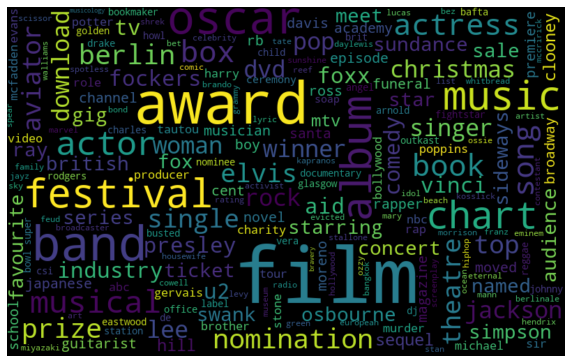

In [152]:
listToStr = ' '.join([str(elem) for elem in entertainment_visualize])
wordcloud_creation(listToStr)

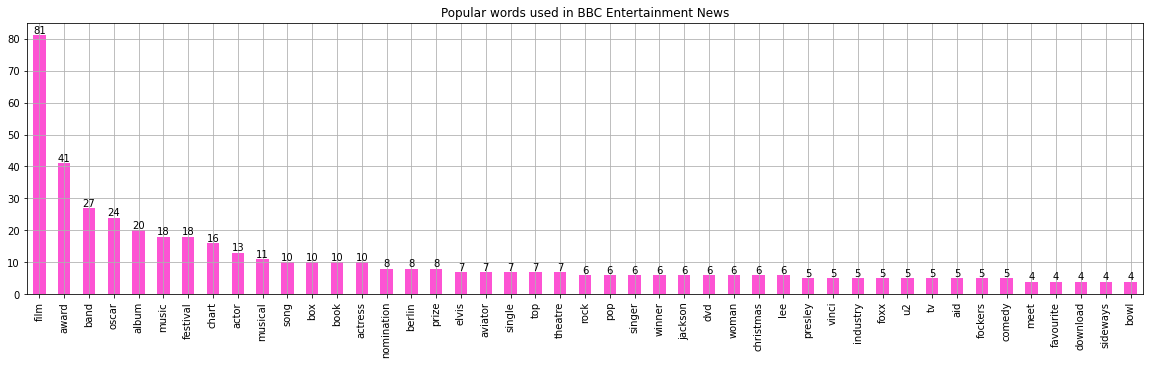

In [153]:
plt.figure(figsize=(20,5))
ax = entertainment_visualize.value_counts().head(45).plot.bar(color='#fd53d3')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Popular words used in BBC Entertainment News')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [154]:
entertainment_nested = []
for row in df_entertainment['keywords']:
    entertainment_nested.append(row)

In [155]:
entertainment_nested

[['ocean', 'sequel', 'twelve', 'soderbergh', 'clooney'],
 ['rating', 'lucas', 'pg', 'sith', 'film'],
 ['scholl', 'film', 'antinazi', 'leaflet', 'berlin'],
 ['dicaprio', 'hughes', 'film', 'aviator', 'actor'],
 ['halloween', 'carpenter', 'hill', 'film', 'escape'],
 ['ice', 'celebrity', 'skater', 'rink', 'paired'],
 ['osbournes', 'ozzy', 'osbourne', 'family', 'mtv'],
 ['hendrix', 'seattle', 'guitarist', 'museum', 'moved'],
 ['music', 'kapranos', 'musician', 'listen', 'franz'],
 ['pop', 'top', 'audience', 'programme', 'music'],
 ['film', 'festival', 'starring', 'screening', 'convicted'],
 ['kasabian', 'meighan', 'band', 'music', 'rock'],
 ['west', 'hiphop', 'artist', 'album', 'jayz'],
 ['audience', 'housewife', 'channel', 'january', 'share'],
 ['cowell', 'aspiring', 'writer', 'idol', 'cavanagh'],
 ['def', 'jayz', 'jam', 'rocafella', 'hiphop'],
 ['kosslick', 'film', 'festival', 'european', 'berlin'],
 ['melcher', 'byrd', 'manson', 'beach', 'doris'],
 ['film', 'miyazaki', 'animation', 'japan

In [156]:
entertainment_transformed = transaction_encoder.fit(entertainment_nested).transform(entertainment_nested)

In [157]:
df_entertainment = pd.DataFrame(entertainment_transformed, columns = transaction_encoder.columns_)
df_entertainment.head()

000th  17yearold  1950s  1xtra   50th     9m  aaliyah   abba    abc  \
0  False      False  False  False  False  False    False  False  False   
1  False      False  False  False  False  False    False  False  False   
2  False      False  False  False  False  False    False  False  False   
3  False      False  False  False  False  False    False  False  False   
4  False      False  False  False  False  False    False  False  False   

   aborted  ...  wonderful  workforce  worst  wraztv  writer  writing  xhosa  \
0    False  ...      False      False  False   False   False    False  False   
1    False  ...      False      False  False   False   False    False  False   
2    False  ...      False      False  False   False   False    False  False   
3    False  ...      False      False  False   False   False    False  False   
4    False  ...      False      False  False   False   False    False  False   

     yen  youssou   zach  
0  False    False  False  
1  False    False  False  
2  False    False  False  
3  False    False  False  
4  False    False  False  

[5 rows x 1113 columns]

## Entertainment: Support Threshold

In [158]:
frequent_itemsets_entertainment = apriori(df_entertainment,
                                          min_support = 0.01,
                                          use_colnames = True)
frequent_itemsets_entertainment

support                    itemsets
0   0.033679                     (actor)
1   0.025907                   (actress)
2   0.012953                       (aid)
3   0.051813                     (album)
4   0.010363                  (audience)
..       ...                         ...
79  0.010363            (sundance, film)
80  0.010363             (meet, fockers)
81  0.010363               (swank, foxx)
82  0.012953    (festival, berlin, film)
83  0.010363  (festival, sundance, film)

[84 rows x 2 columns]

In [173]:
frequent_itemsets_entertainment[['support']].describe()

support
count  84.000000
mean    0.021034
std     0.025820
min     0.010363
25%     0.010363
50%     0.012953
75%     0.020725
max     0.209845

## Entertainment: Confidence Threshold

In [159]:
rules_c = association_rules(frequent_itemsets_entertainment, metric="confidence", min_threshold=0.7)
rules_c

antecedents       consequents  antecedent support  \
0             (sideways)           (award)            0.010363   
1                   (u2)            (band)            0.012953   
2               (berlin)            (film)            0.020725   
3             (festival)            (film)            0.046632   
4             (sundance)        (festival)            0.010363   
5             (sundance)            (film)            0.010363   
6                 (meet)         (fockers)            0.010363   
7              (fockers)            (meet)            0.012953   
8                (swank)            (foxx)            0.010363   
9                 (foxx)           (swank)            0.012953   
10    (festival, berlin)            (film)            0.012953   
11  (festival, sundance)            (film)            0.010363   
12      (sundance, film)        (festival)            0.010363   
13            (sundance)  (festival, film)            0.010363   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.106218  0.010363    1.000000   9.414634  0.009262         inf  
1             0.069948  0.012953    1.000000  14.296296  0.012047         inf  
2             0.209845  0.020725    1.000000   4.765432  0.016376         inf  
3             0.209845  0.036269    0.777778   3.706447  0.026484    3.555699  
4             0.046632  0.010363    1.000000  21.444444  0.009879         inf  
5             0.209845  0.010363    1.000000   4.765432  0.008188         inf  
6             0.012953  0.010363    1.000000  77.200000  0.010228         inf  
7             0.010363  0.010363    0.800000  77.200000  0.010228    4.948187  
8             0.012953  0.010363    1.000000  77.200000  0.010228         inf  
9             0.010363  0.010363    0.800000  77.200000  0.010228    4.948187  
10            0.209845  0.012953    1.000000   4.765432  0.010235         inf  
11            0.209845  0.010363    1.000000   4.765432  0.008188         inf  
12            0.046632  0.010363    1.000000  21.444444  0.009879         inf  
13            0.036269  0.010363    1.000000  27.571429  0.009987         inf

In [160]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

antecedents consequents  antecedent support  consequent support  \
0             (sideways)     (award)            0.010363            0.106218   
1                   (u2)      (band)            0.012953            0.069948   
2               (berlin)      (film)            0.020725            0.209845   
4             (sundance)  (festival)            0.010363            0.046632   
5             (sundance)      (film)            0.010363            0.209845   
6                 (meet)   (fockers)            0.010363            0.012953   
8                (swank)      (foxx)            0.010363            0.012953   
10    (festival, berlin)      (film)            0.012953            0.209845   
11  (festival, sundance)      (film)            0.010363            0.209845   
12      (sundance, film)  (festival)            0.010363            0.046632   

     support  confidence       lift  leverage  conviction  
0   0.010363         1.0   9.414634  0.009262         inf  
1   0.012953         1.0  14.296296  0.012047         inf  
2   0.020725         1.0   4.765432  0.016376         inf  
4   0.010363         1.0  21.444444  0.009879         inf  
5   0.010363         1.0   4.765432  0.008188         inf  
6   0.010363         1.0  77.200000  0.010228         inf  
8   0.010363         1.0  77.200000  0.010228         inf  
10  0.012953         1.0   4.765432  0.010235         inf  
11  0.010363         1.0   4.765432  0.008188         inf  
12  0.010363         1.0  21.444444  0.009879         inf

<AxesSubplot:>

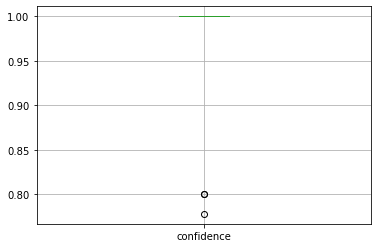

In [161]:
rules_c[['confidence']].boxplot()

## Entertainment: Lift Threshold

In [162]:
rules_l = association_rules(frequent_itemsets_entertainment, metric = 'lift', min_threshold = 15)
rules_l

antecedents       consequents  antecedent support  \
0         (festival)        (sundance)            0.046632   
1         (sundance)        (festival)            0.010363   
2             (meet)         (fockers)            0.010363   
3          (fockers)            (meet)            0.012953   
4            (swank)            (foxx)            0.010363   
5             (foxx)           (swank)            0.012953   
6   (festival, film)          (berlin)            0.036269   
7           (berlin)  (festival, film)            0.020725   
8   (festival, film)        (sundance)            0.036269   
9   (sundance, film)        (festival)            0.010363   
10        (festival)  (sundance, film)            0.046632   
11        (sundance)  (festival, film)            0.010363   

    consequent support   support  confidence       lift  leverage  conviction  
0             0.010363  0.010363    0.222222  21.444444  0.009879    1.272391  
1             0.046632  0.010363    1.000000  21.444444  0.009879         inf  
2             0.012953  0.010363    1.000000  77.200000  0.010228         inf  
3             0.010363  0.010363    0.800000  77.200000  0.010228    4.948187  
4             0.012953  0.010363    1.000000  77.200000  0.010228         inf  
5             0.010363  0.010363    0.800000  77.200000  0.010228    4.948187  
6             0.020725  0.012953    0.357143  17.232143  0.012202    1.523316  
7             0.036269  0.012953    0.625000  17.232143  0.012202    2.569948  
8             0.010363  0.010363    0.285714  27.571429  0.009987    1.385492  
9             0.046632  0.010363    1.000000  21.444444  0.009879         inf  
10            0.010363  0.010363    0.222222  21.444444  0.009879    1.272391  
11            0.036269  0.010363    1.000000  27.571429  0.009987         inf

In [163]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

antecedents       consequents  antecedent support  \
2             (meet)         (fockers)            0.010363   
3          (fockers)            (meet)            0.012953   
4            (swank)            (foxx)            0.010363   
5             (foxx)           (swank)            0.012953   
8   (festival, film)        (sundance)            0.036269   
11        (sundance)  (festival, film)            0.010363   
0         (festival)        (sundance)            0.046632   
1         (sundance)        (festival)            0.010363   
9   (sundance, film)        (festival)            0.010363   
10        (festival)  (sundance, film)            0.046632   

    consequent support   support  confidence       lift  leverage  conviction  
2             0.012953  0.010363    1.000000  77.200000  0.010228         inf  
3             0.010363  0.010363    0.800000  77.200000  0.010228    4.948187  
4             0.012953  0.010363    1.000000  77.200000  0.010228         inf  
5             0.010363  0.010363    0.800000  77.200000  0.010228    4.948187  
8             0.010363  0.010363    0.285714  27.571429  0.009987    1.385492  
11            0.036269  0.010363    1.000000  27.571429  0.009987         inf  
0             0.010363  0.010363    0.222222  21.444444  0.009879    1.272391  
1             0.046632  0.010363    1.000000  21.444444  0.009879         inf  
9             0.046632  0.010363    1.000000  21.444444  0.009879         inf  
10            0.010363  0.010363    0.222222  21.444444  0.009879    1.272391

<AxesSubplot:>

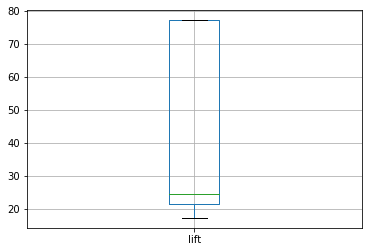

In [164]:
rules_l[['lift']].boxplot()

## Entertainment: Support + Confidence + Lift

In [165]:
final_rules_entertainment = rules_c[ (rules_c['lift'] >= 15) & (rules_c['confidence'] >= 0.70) ]
final_rules_entertainment

antecedents       consequents  antecedent support  \
4         (sundance)        (festival)            0.010363   
6             (meet)         (fockers)            0.010363   
8            (swank)            (foxx)            0.010363   
12  (sundance, film)        (festival)            0.010363   
13        (sundance)  (festival, film)            0.010363   
7          (fockers)            (meet)            0.012953   
9             (foxx)           (swank)            0.012953   

    consequent support   support  confidence       lift  leverage  conviction  
4             0.046632  0.010363         1.0  21.444444  0.009879         inf  
6             0.012953  0.010363         1.0  77.200000  0.010228         inf  
8             0.012953  0.010363         1.0  77.200000  0.010228         inf  
12            0.046632  0.010363         1.0  21.444444  0.009879         inf  
13            0.036269  0.010363         1.0  27.571429  0.009987         inf  
7             0.010363  0.010363         0.8  77.200000  0.010228    4.948187  
9             0.010363  0.010363         0.8  77.200000  0.010228    4.948187

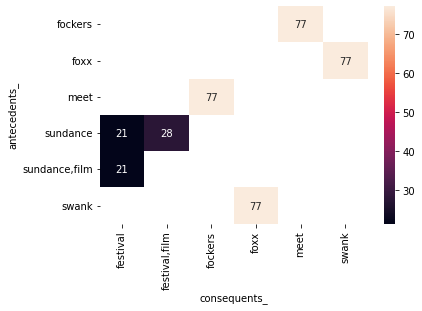

In [166]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import seaborn as sns
final_rules_entertainment['lhs_items'] = final_rules_entertainment['antecedents'].apply(lambda x:len(x) )
final_rules_entertainment[final_rules_entertainment['lhs_items']>0.5].sort_values('lift', ascending=False).head()
final_rules_entertainment['antecedents_'] = final_rules_entertainment['antecedents'].apply(lambda a: ','.join(list(a)))
final_rules_entertainment['consequents_'] = final_rules_entertainment['consequents'].apply(lambda a: ','.join(list(a)))
pivot = final_rules_entertainment[final_rules_entertainment['lhs_items']>0.5].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [167]:
pd.DataFrame(texts_counts.toarray()).to_csv('SeoShinYoun_BagOfWords.csv')

In [168]:
pd.DataFrame(texts_tfidf.toarray()).to_csv('SeoShinYoun_TFIDF.csv')

In [169]:
df.to_csv('df_export.csv')

## THE END 